<a href="https://colab.research.google.com/github/anjali20082/PerfEval/blob/master/CorrelationAnalysis_PythonNotebooks/Bytes_Times_Correlation/scatterPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVR
#from skfeature.function.similarity_based import fisher_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.manifold import MDS
import csv
import sys
import scipy
%matplotlib inline

plt.rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['figure.figsize'] = 14, 10

SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

feature_lists = {
	"youtube": ["Youtube_search channel page", "Youtube_search channel page", "Youtube_search video page","Youtube_play video page"],
	"linkedin":["LinkedIn_view profile", "LinkedIn_check my connections","LinkedIn_search results page", "LinkedIn_person profile page"],
	"hotstar":["Hotstar_open trending page", "Hotstar_search video"],
	"facebook":["Facebook_search results page","Facebook_person profile page"],
	"flipkart":["Flipkart_search product","Flipkart_product profile page","Flipkart_add to cart","Flipkart_go to cart"],
	"amazon":["Amazon_search results page", "Amazon_product profile page", "Amazon_add to cart", "Amazon_go to cart", "Amazon_remove from cart"],
	"telegram":["Telegram_sending message"],
	"whatsapp":["Whatsapp_sending message"],
	"gmaps":["GoogleMaps_searching place"],
	"gnews":["GoogleNews_opening news page"],
	"dailyhunt":["Dailyhunt_search results page", "Dailyhunt_opening news page"],
	"paytm":["Paytm_transaction from wallet"],
	# "mobikwik":["Mobikwik_transaction from wallet"]

}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dataset = pd.read_csv('/content/drive/MyDrive/SummerSem/Capstone_PerfEval/Bytes_Time_correlation/controlled_data_os8_Full.csv')
dataset = pd.read_csv('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/controlled_data_os8_Full.csv')
(dataset)


,APP,VERSION,FEATURE_NAME,LATENCY,RX_BYTES (MB),TX_BYTES (MB),RX_BYTES_OLD (MB),TX_BYTES_OLD (MB),#TCP_CONNECTIONS,#UDP_CONNECTIONS,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK
0,dailyhunt,v3,opening news page,3000,0.039100,0.007330,0.253564,0.207078,2,0,9.57,NaN,NaN
1,flipkart,v3,search product result,222,0.145883,0.049829,0.299076,0.102057,0,0,9.95,NaN,NaN
2,flipkart,v3,product profile,5754,0.032837,0.013976,0.299076,0.102057,0,0,9.95,NaN,NaN
3,flipkart,v3,add to cart,5405,0.043594,0.014566,0.299076,0.102057,0,0,9.95,NaN,NaN
4,flipkart,v3,go to cart,5405,0.072447,0.020477,0.299076,0.102057,0,0,9.95,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,paytm,v3,transaction from wallet,0,0.051455,0.035435,0.051455,0.035435,0,0,13.55,NaN,NaN
717,paytm,v3,transaction from wallet,0,0.539076,0.057305,0.539076,0.057305,0,0,11.70,NaN,NaN
718,paytm,v3,transaction from wallet,60,0.270620,0.145775,0.270620,0.145775,10,0,34.50,NaN,NaN
719,paytm,v3,transaction from wallet,60,0.274593,0.115102,0.274593,0.115102,10,0,36.45,NaN,NaN


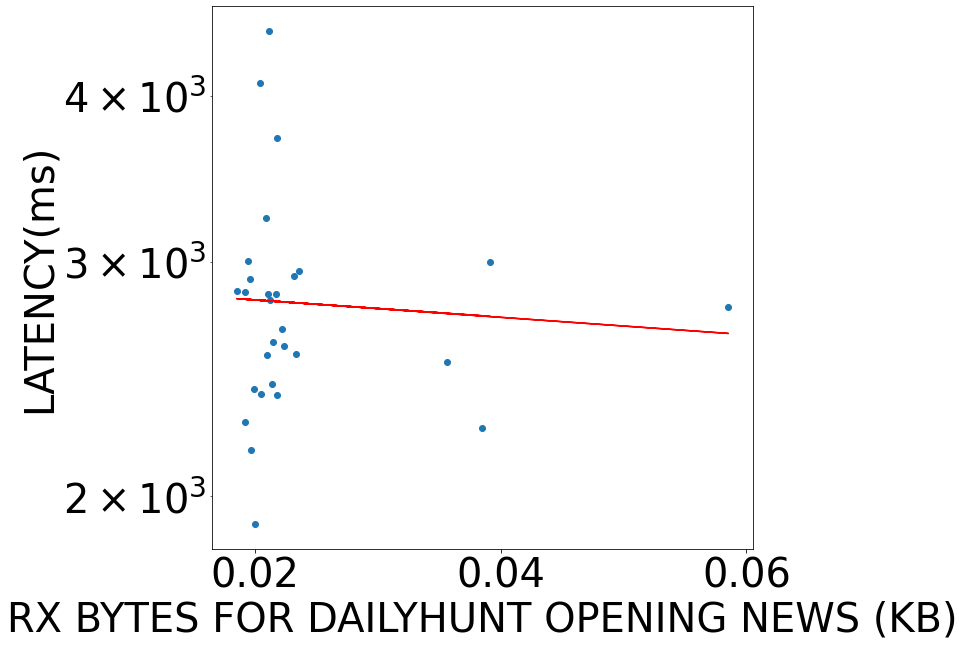

In [ ]:
latency = dataset[dataset['APP']=='dailyhunt']['LATENCY']
rx = dataset[dataset['APP']=='dailyhunt']['RX_BYTES (MB)']
# rx = rx*1024
plt.figure(figsize=(14,10))

from scipy import stats
#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(rx, latency)
line = slope*rx+intercept
plt.plot(rx, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end
plt.yscale('log')
plt.scatter(rx, latency, marker='o')
plt.xlabel("RX BYTES FOR DAILYHUNT OPENING NEWS (KB)")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+ 
            'RX BYTES FOR DAILYHUNT OPENING NEWS.pdf', bbox_inches='tight')

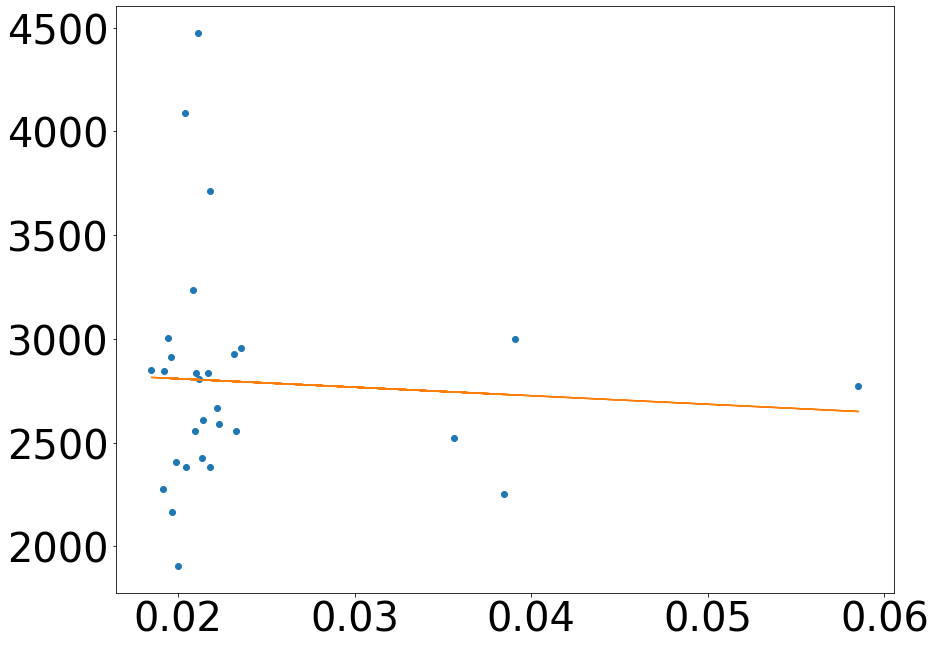

In [ ]:
plt.plot(rx, latency,'o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b, '-')


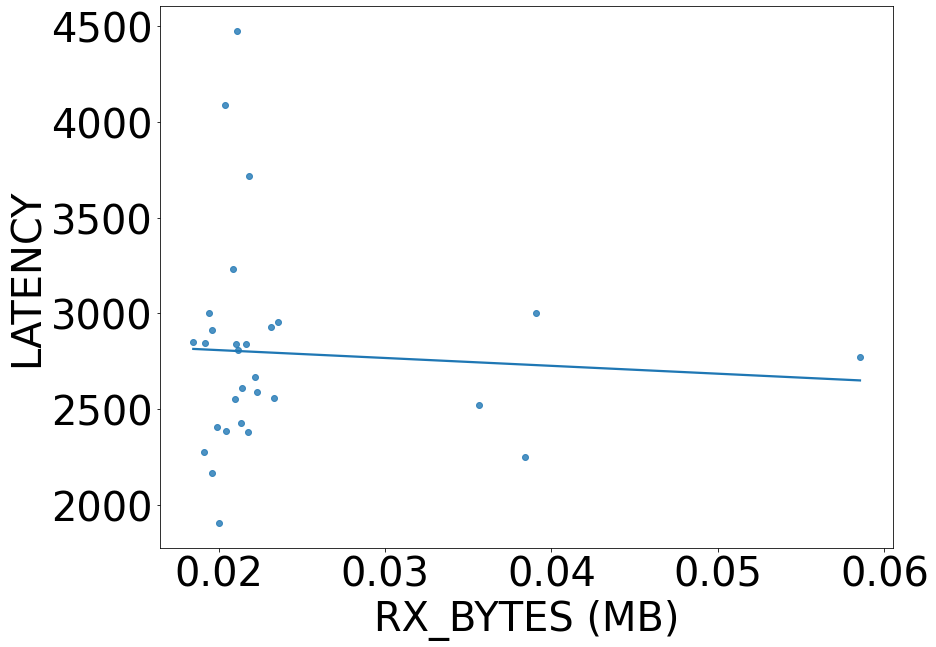

In [ ]:
sb.regplot(x=rx, y=latency) 

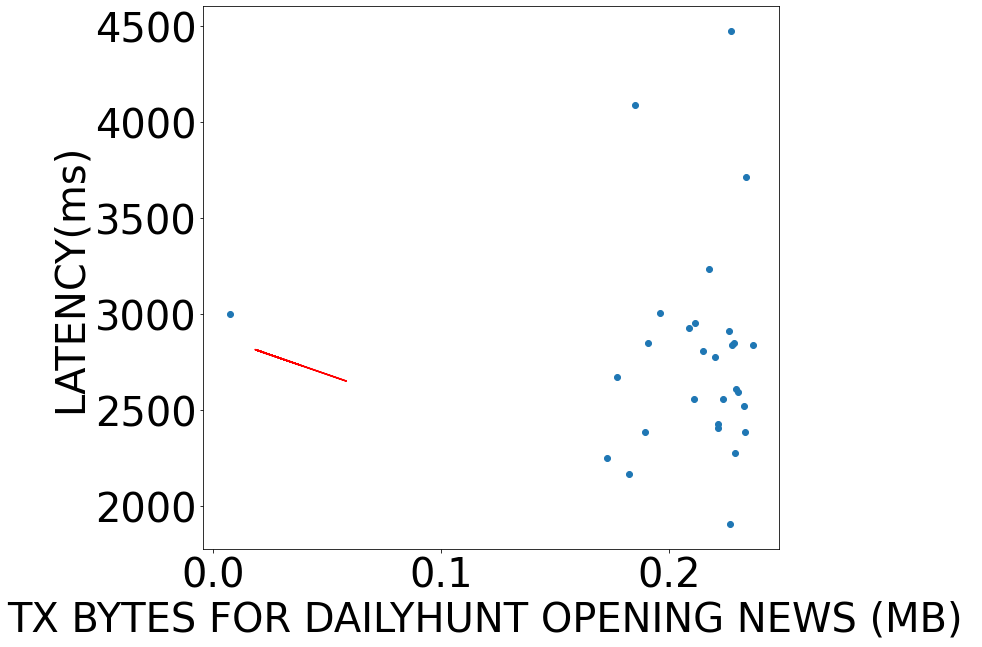

In [ ]:
latency = dataset[dataset['APP']=='dailyhunt']['LATENCY']
tx = dataset[dataset['APP']=='dailyhunt']['TX_BYTES (MB)']
# print(latency)
# print(tx)

plt.figure(figsize=(14,10))
from scipy import stats
#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(rx, latency)
line = slope*rx+intercept
plt.plot(rx, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end

plt.scatter(tx, latency, marker='o')
# m, b = np.polyfit(tx, latency, 1)
# plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR DAILYHUNT OPENING NEWS (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR DAILYHUNT OPENING NEWS.pdf', bbox_inches='tight')

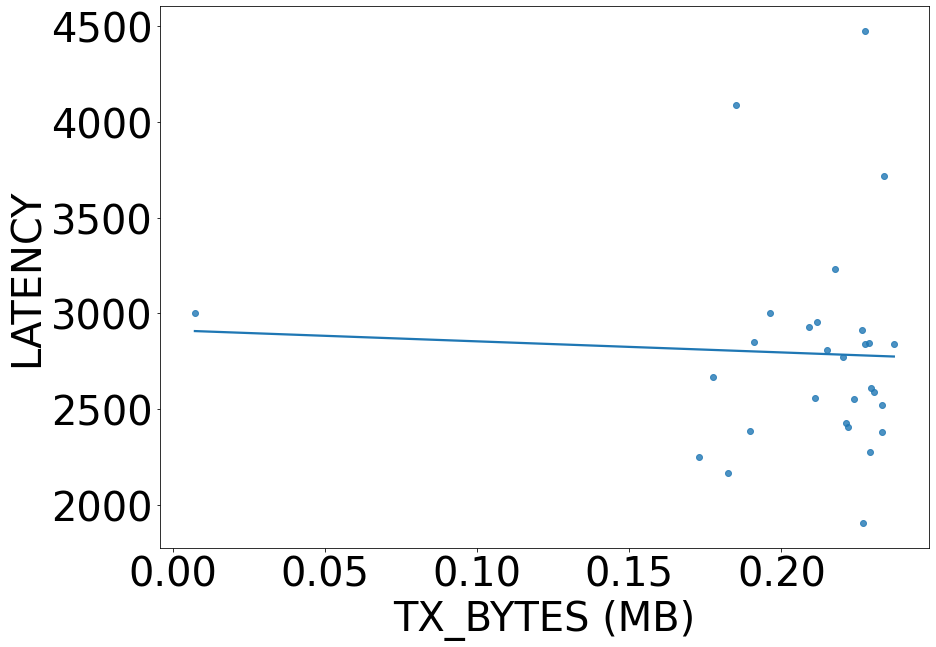

In [ ]:
sb.regplot(x=tx, y=latency, ci=None)

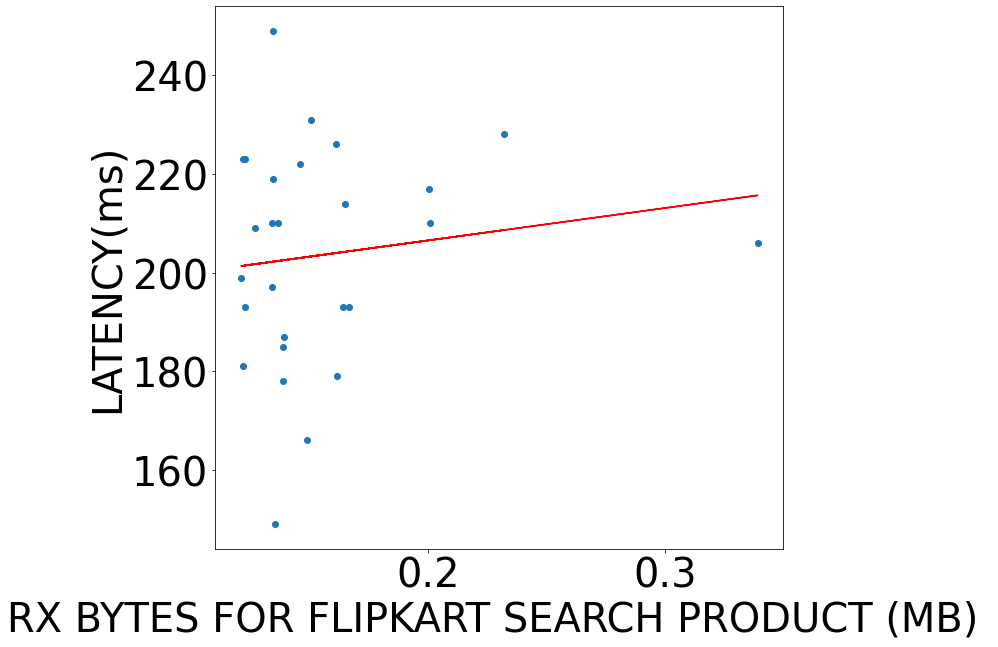

In [ ]:
# search product result
latency = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'search product result')]['LATENCY']
rx = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'search product result')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
from scipy import stats
#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(rx, latency)
line = slope*rx+intercept
plt.plot(rx, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end

plt.scatter(rx, latency, marker='o') 
# m, b = np.polyfit(rx, latency, 1) 
# plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR FLIPKART SEARCH PRODUCT (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR FLIPKART SEARCH PRODUCT.pdf', bbox_inches='tight')

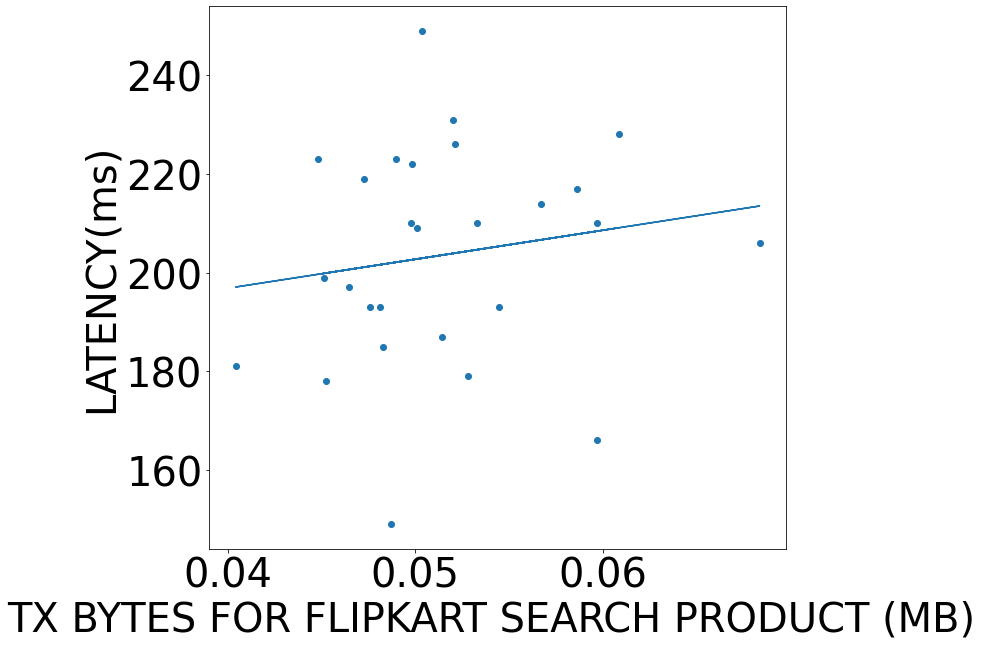

In [ ]:
# search product result
latency = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'search product result')]['LATENCY']
tx = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'search product result')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR FLIPKART SEARCH PRODUCT (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR FLIPKART SEARCH PRODUCT.pdf', bbox_inches='tight')

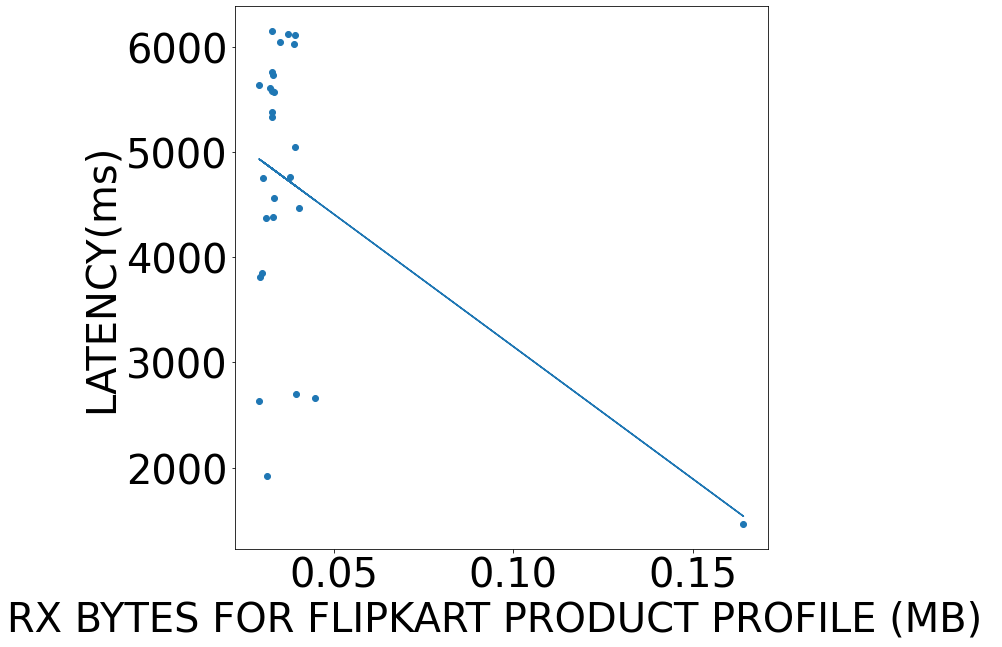

In [ ]:
# product profile
latency = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'product profile')]['LATENCY']
rx = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'product profile')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR FLIPKART PRODUCT PROFILE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR FLIPKART PRODUCT PROFILE.pdf', bbox_inches='tight')

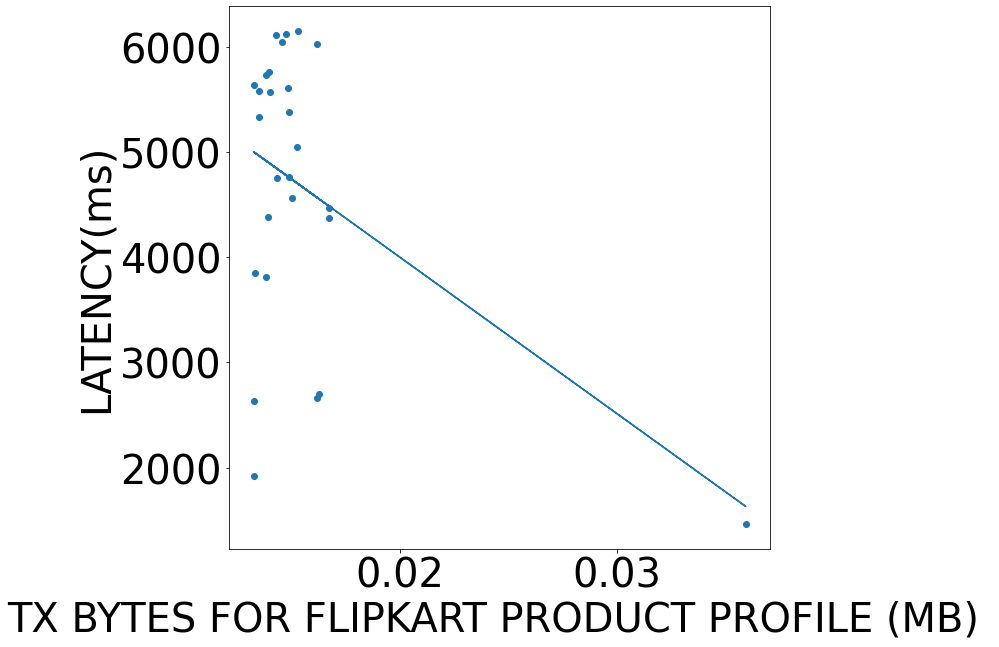

In [ ]:
# product profile
latency = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'product profile')]['LATENCY']
tx = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'product profile')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR FLIPKART PRODUCT PROFILE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR FLIPKART PRODUCT PROFILE.pdf', bbox_inches='tight')

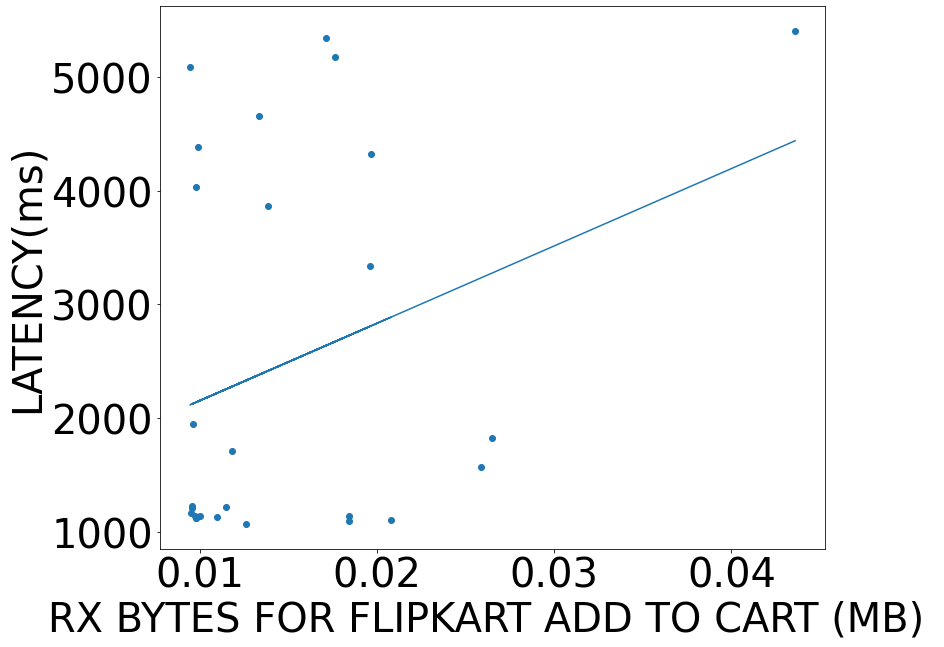

In [ ]:
# add to cart
latency = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'add to cart')]['LATENCY']
rx = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'add to cart')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR FLIPKART ADD TO CART (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR FLIPKART ADD TO CART.pdf', bbox_inches='tight')

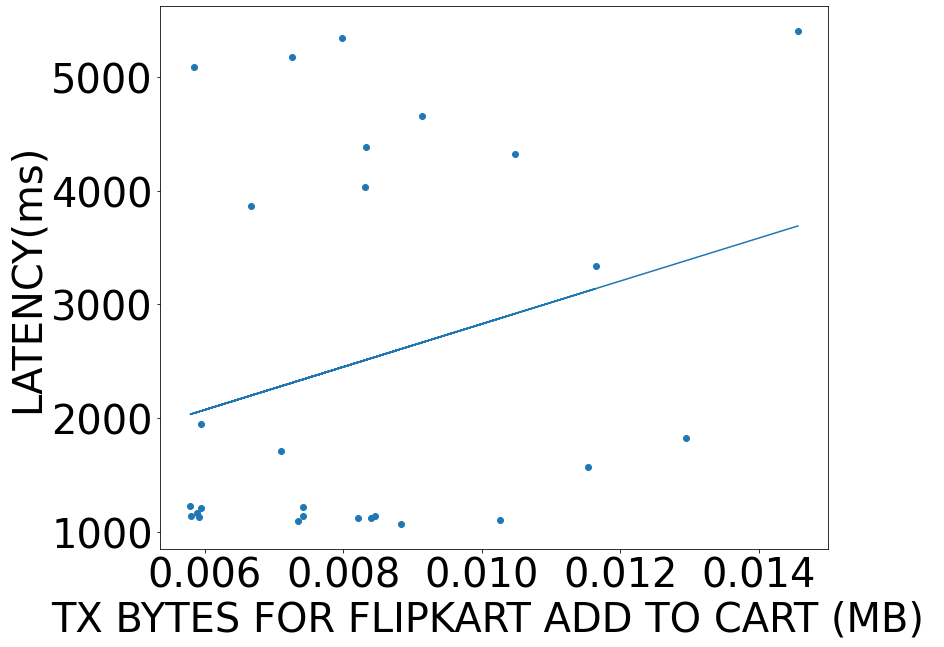

In [ ]:
# add to cart
latency = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'add to cart')]['LATENCY']
tx = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'add to cart')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR FLIPKART ADD TO CART (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR FLIPKART ADD TO CART.pdf', bbox_inches='tight')

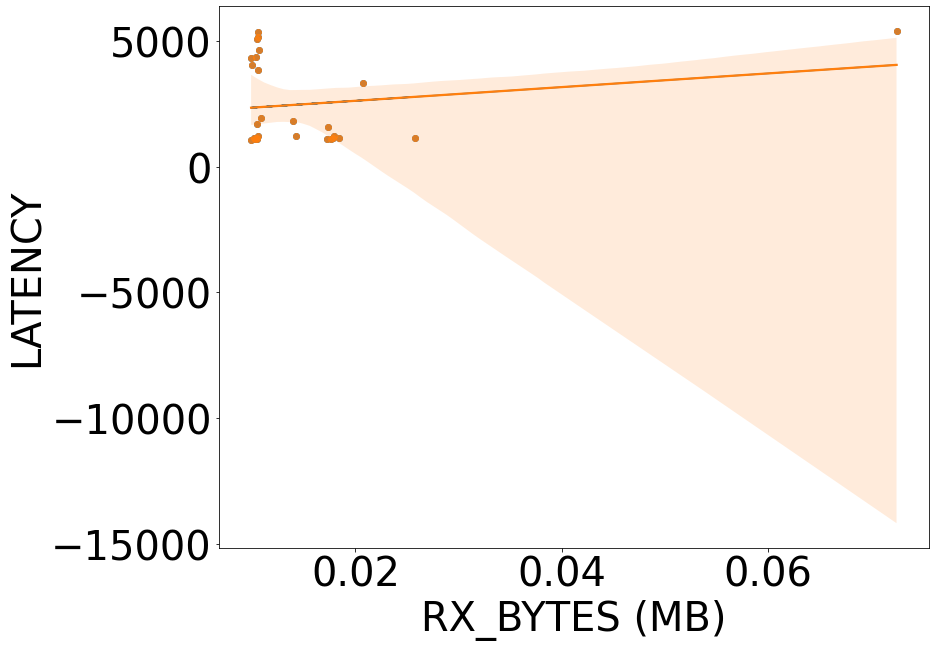

In [ ]:
# go to cart
latency = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'go to cart')]['LATENCY']
rx = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'go to cart')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR FLIPKART GO TO CART (MB) ")
plt.ylabel("LATENCY(ms)")
sb.regplot(x=rx, y=latency) 
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
#             'RX BYTES FOR FLIPKART GO TO CART.pdf', bbox_inches='tight')

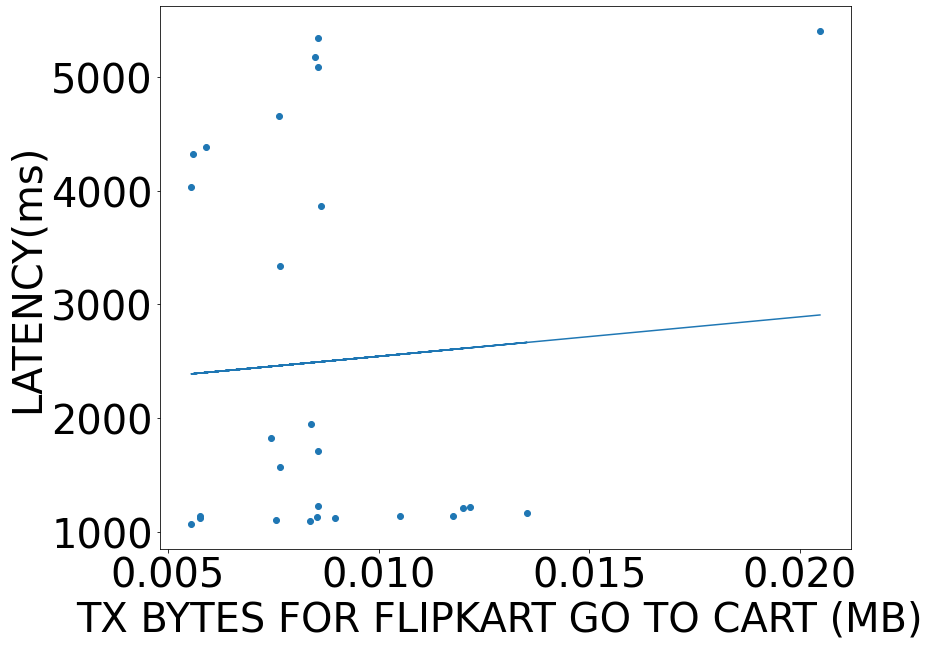

In [ ]:
# go to cart
latency = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'go to cart')]['LATENCY']
tx = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'go to cart')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR FLIPKART GO TO CART (MB) ")
plt.ylabel("LATENCY(ms)")

# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR FLIPKART GO TO CART.pdf', bbox_inches='tight')

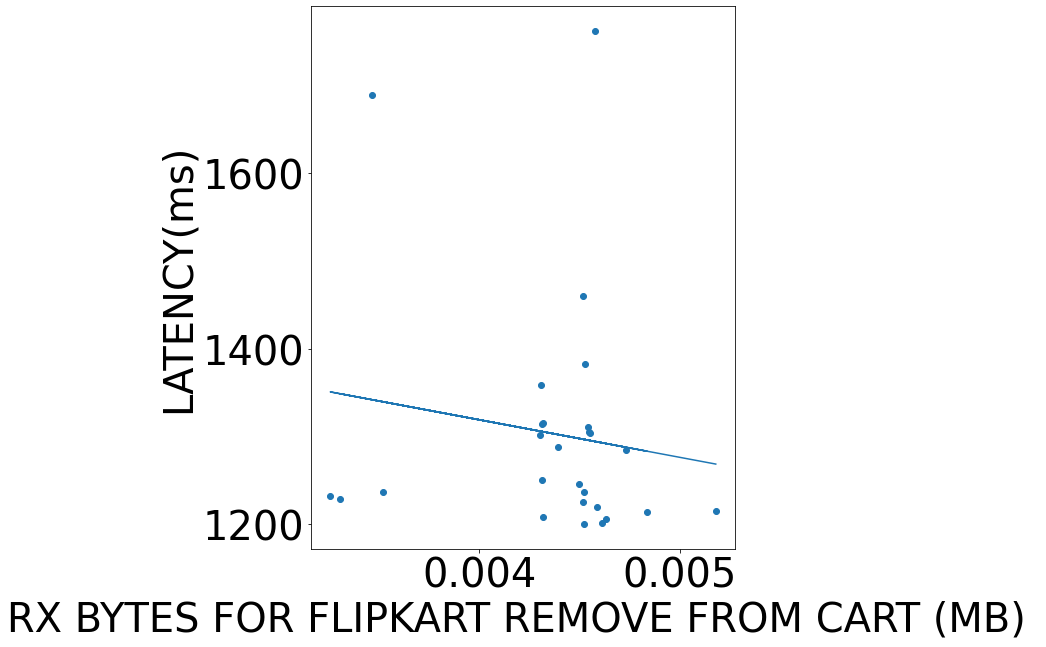

In [ ]:
# remove from cart
latency = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'remove from cart')]['LATENCY']
rx = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'remove from cart')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR FLIPKART REMOVE FROM CART (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR FLIPKART REMOVE FROM CART.pdf', bbox_inches='tight')

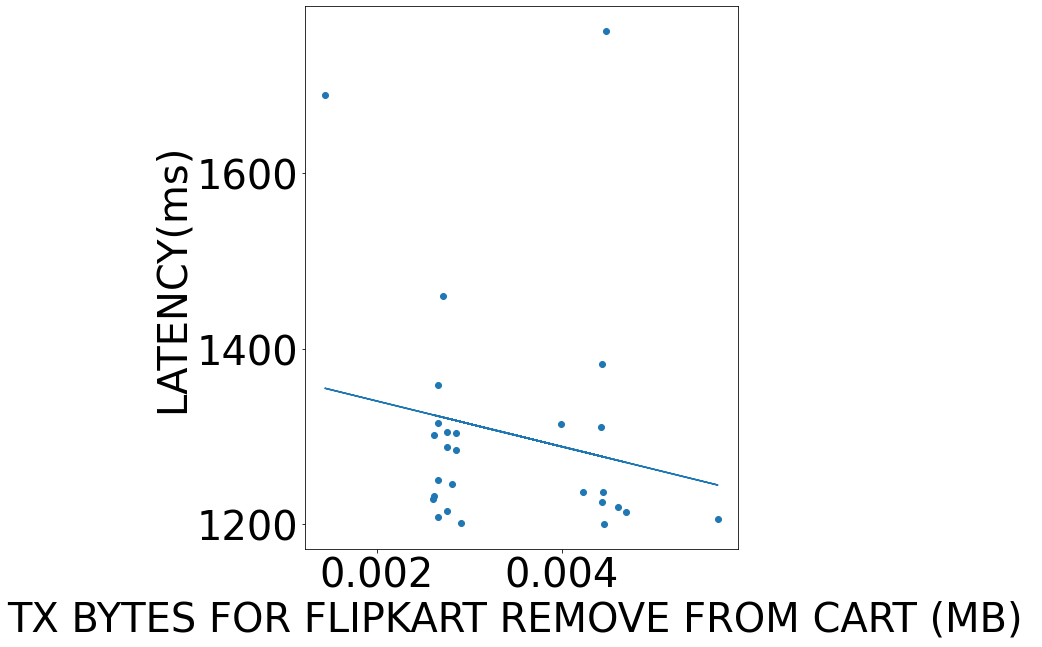

In [ ]:
# remove from cart
latency = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'remove from cart')]['LATENCY']
tx = dataset[(dataset['APP']=='flipkart') & (dataset['FEATURE_NAME']== 'remove from cart')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR FLIPKART REMOVE FROM CART (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR FLIPKART REMOVE FROM CART.pdf', bbox_inches='tight')

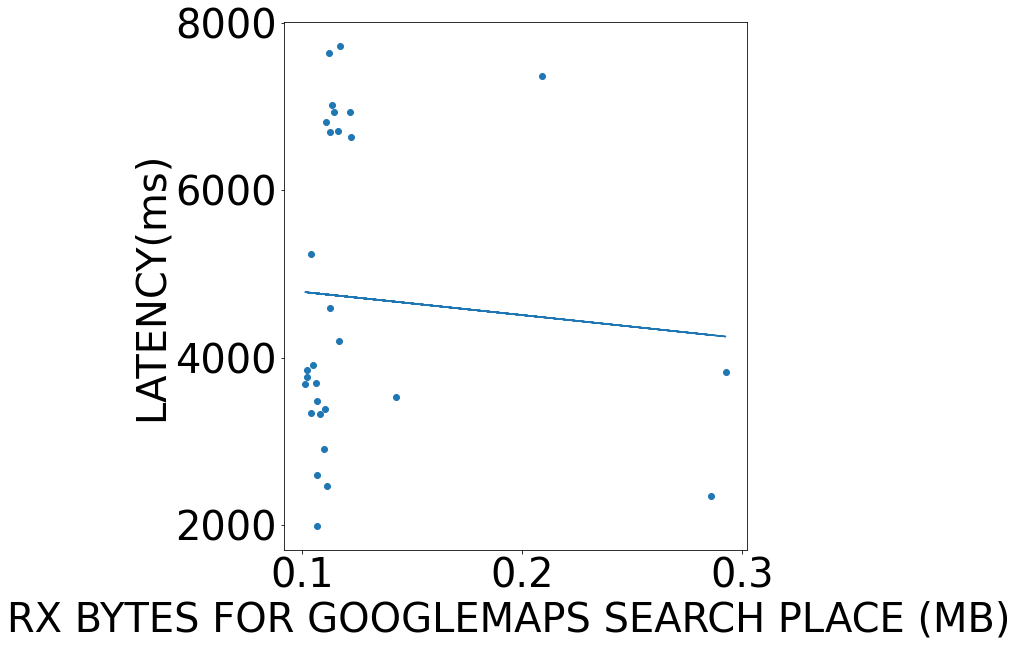

In [ ]:
latency = dataset[(dataset['APP']=='googlemaps') & (dataset['FEATURE_NAME']== 'search place')]['LATENCY']
rx = dataset[(dataset['APP']=='googlemaps') & (dataset['FEATURE_NAME']== 'search place')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR GOOGLEMAPS SEARCH PLACE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR GOOGLEMAPS SEARCH PLACE.pdf', bbox_inches='tight')

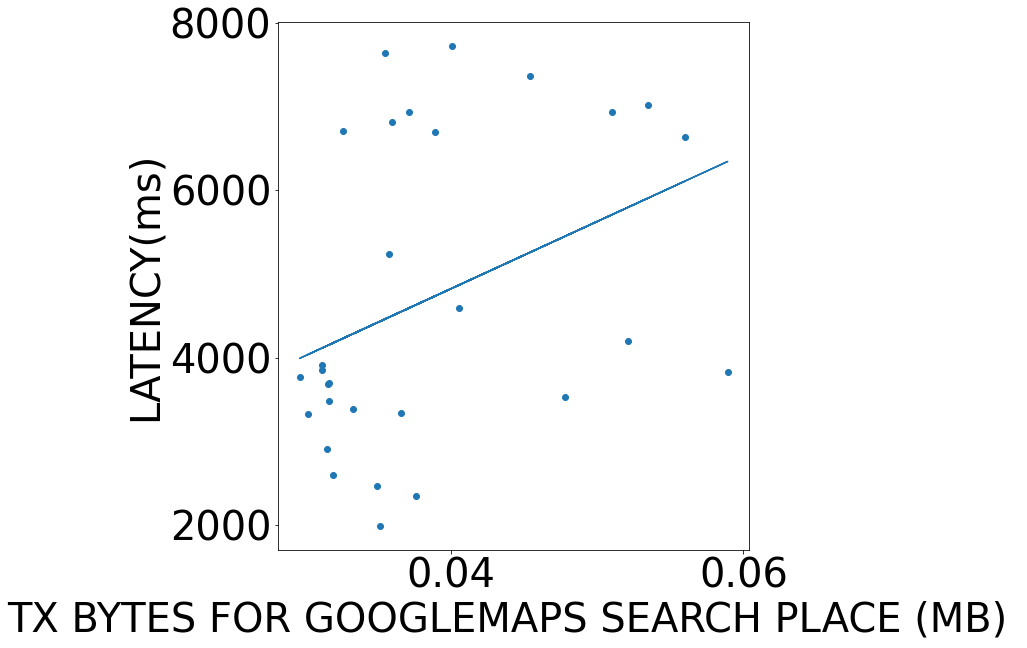

In [ ]:
latency = dataset[(dataset['APP']=='googlemaps') & (dataset['FEATURE_NAME']== 'search place')]['LATENCY']
tx = dataset[(dataset['APP']=='googlemaps') & (dataset['FEATURE_NAME']== 'search place')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR GOOGLEMAPS SEARCH PLACE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR GOOGLEMAPS SEARCH PLACE.pdf', bbox_inches='tight')

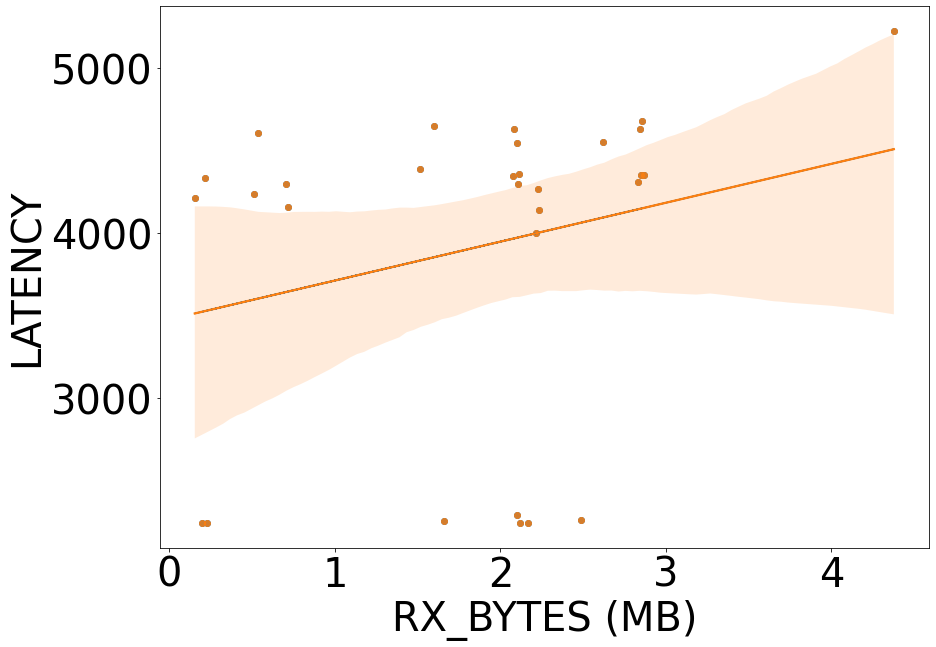

In [ ]:
latency = dataset[(dataset['APP']=='hotstar') & (dataset['FEATURE_NAME']== 'search video page')]['LATENCY']
rx = dataset[(dataset['APP']=='hotstar') & (dataset['FEATURE_NAME']== 'search video page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR HOTSTAR SEARCH VIDEO (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
sb.regplot(x=rx, y=latency) 
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
#             'RX BYTES FOR HOTSTAR SEARCH VIDEO.pdf', bbox_inches='tight')


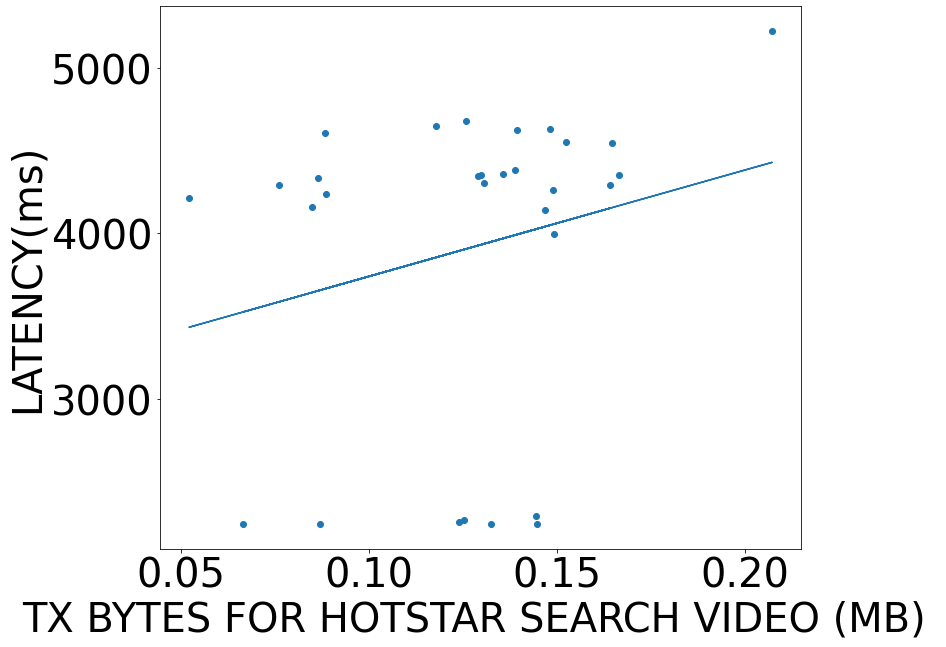

In [ ]:
latency = dataset[(dataset['APP']=='hotstar') & (dataset['FEATURE_NAME']== 'search video page')]['LATENCY']
tx = dataset[(dataset['APP']=='hotstar') & (dataset['FEATURE_NAME']== 'search video page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR HOTSTAR SEARCH VIDEO (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR HOTSTAR SEARCH VIDEO.pdf', bbox_inches='tight')

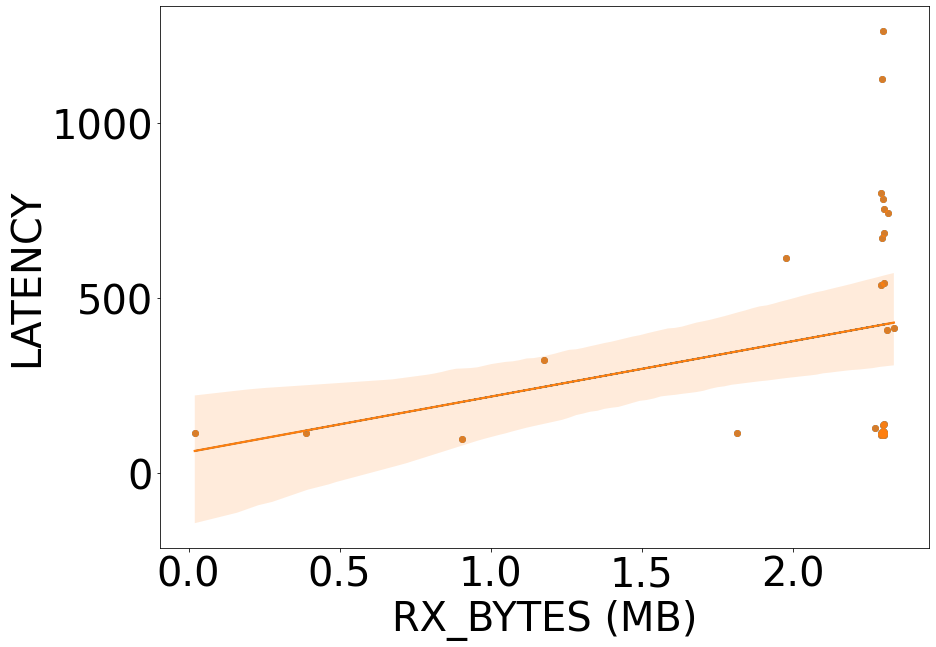

In [ ]:
latency = dataset[(dataset['APP']=='hotstar') & (dataset['FEATURE_NAME']== 'play video page')]['LATENCY']
rx = dataset[(dataset['APP']=='hotstar') & (dataset['FEATURE_NAME']== 'play video page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR HOTSTAR PLAY VIDEO (MB) ")
plt.ylabel("LATENCY(ms)")
sb.regplot(x=rx, y=latency) 
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
#             'RX BYTES FOR HOTSTAR PLAY VIDEO.pdf', bbox_inches='tight')

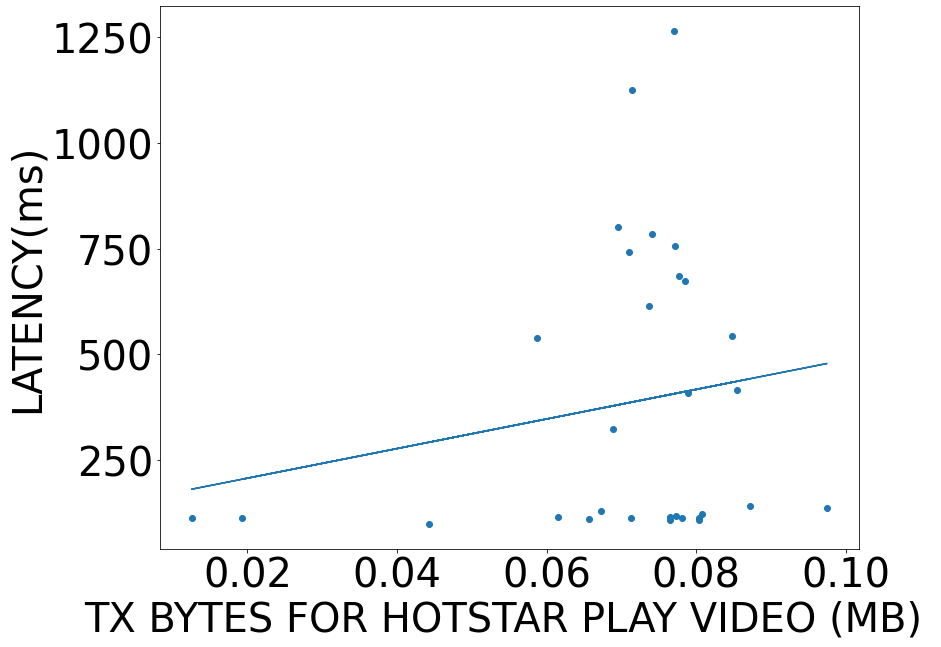

In [ ]:
latency = dataset[(dataset['APP']=='hotstar') & (dataset['FEATURE_NAME']== 'play video page')]['LATENCY']
tx = dataset[(dataset['APP']=='hotstar') & (dataset['FEATURE_NAME']== 'play video page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR HOTSTAR PLAY VIDEO (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR HOTSTAR PLAY VIDEO.pdf', bbox_inches='tight')

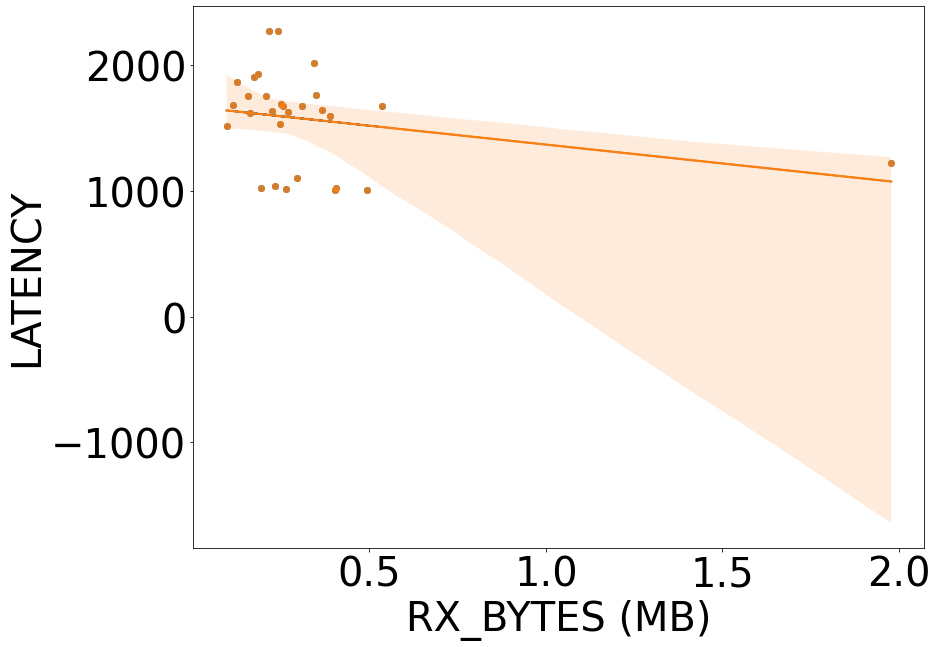

In [ ]:
latency = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'my connections page')]['LATENCY']
rx = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'my connections page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR LINKEDIN MY CONNECTIONS (MB) ")
plt.ylabel("LATENCY(ms)")
sb.regplot(x=rx, y=latency) 
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
#             'RX BYTES FOR LINKEDIN MY CONNECTIONS.pdf', bbox_inches='tight')

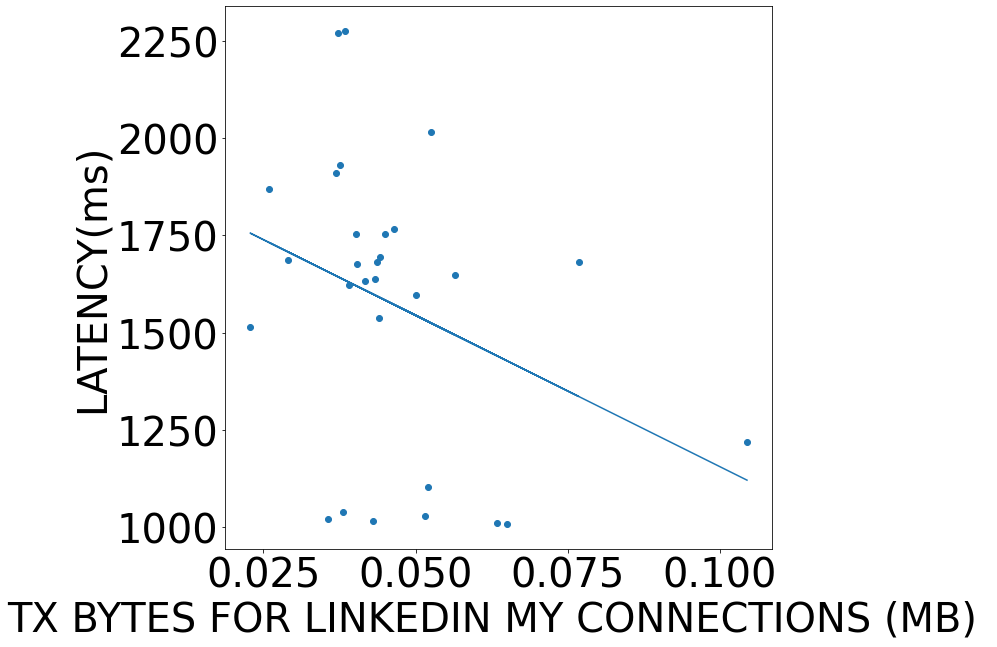

In [ ]:
latency = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'my connections page')]['LATENCY']
tx = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'my connections page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR LINKEDIN MY CONNECTIONS (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR LINKEDIN MY CONNECTIONS.pdf', bbox_inches='tight')

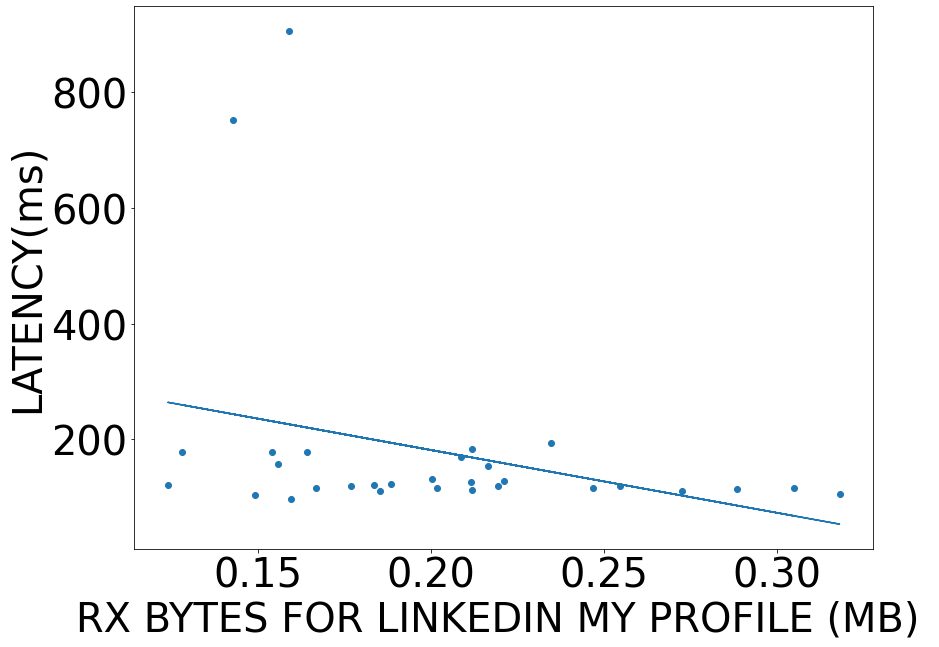

In [ ]:
latency = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'my profile page')]['LATENCY']
rx = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'my profile page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR LINKEDIN MY PROFILE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR LINKEDIN MY PROFILE.pdf', bbox_inches='tight')

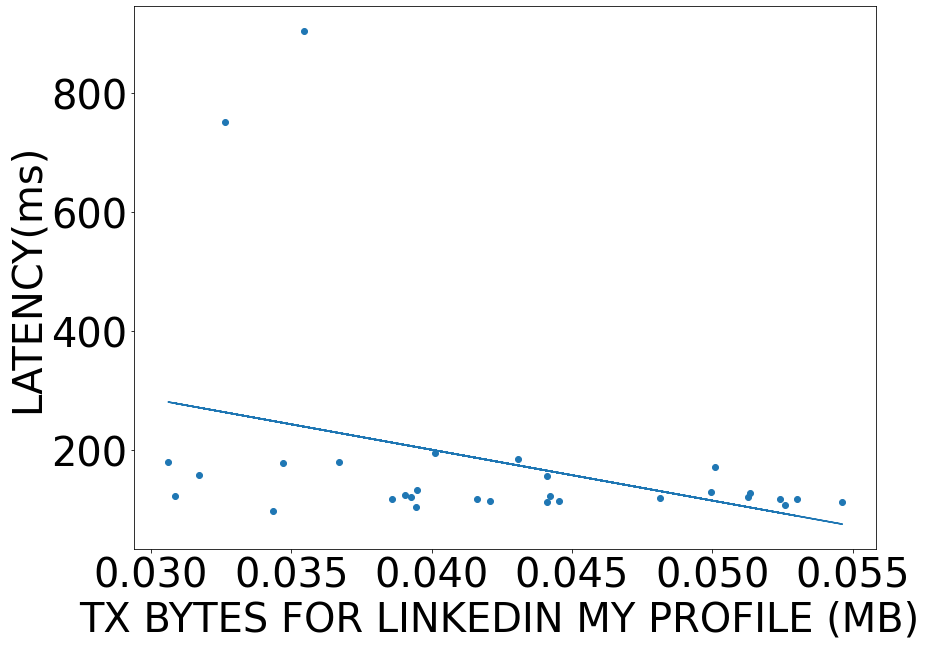

In [ ]:
latency = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'my profile page')]['LATENCY']
tx = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'my profile page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR LINKEDIN MY PROFILE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR LINKEDIN MY PROFILE.pdf', bbox_inches='tight')

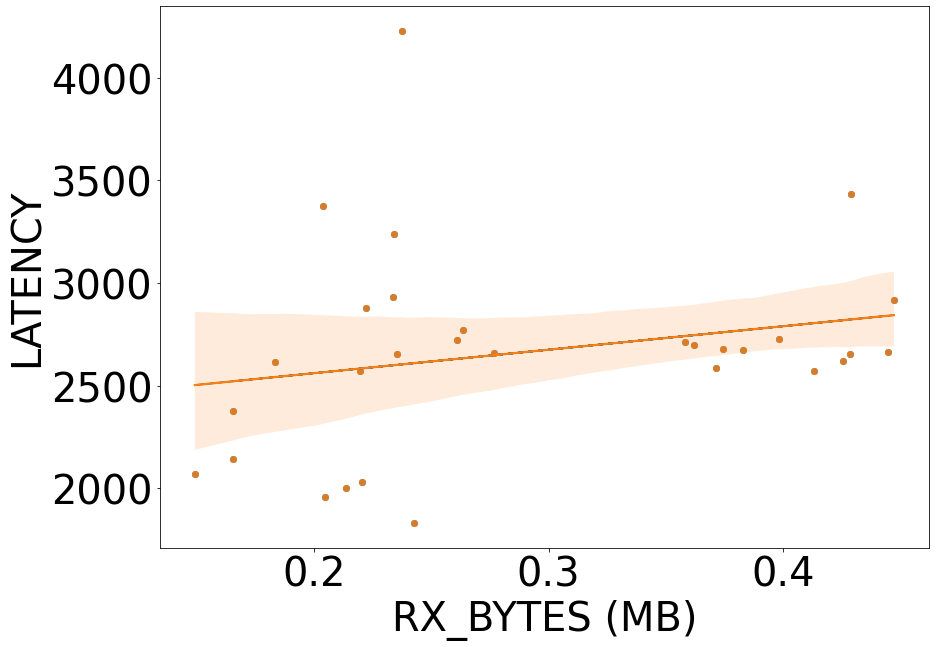

In [ ]:
latency = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'search results page')]['LATENCY']
rx = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'search results page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR LINKEDIN SEARCH RESULTS (MB) ")
plt.ylabel("LATENCY(ms)")
sb.regplot(x=rx, y=latency) 
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
#             'RX BYTES FOR LINKEDIN SEARCH RESULTS.pdf', bbox_inches='tight')

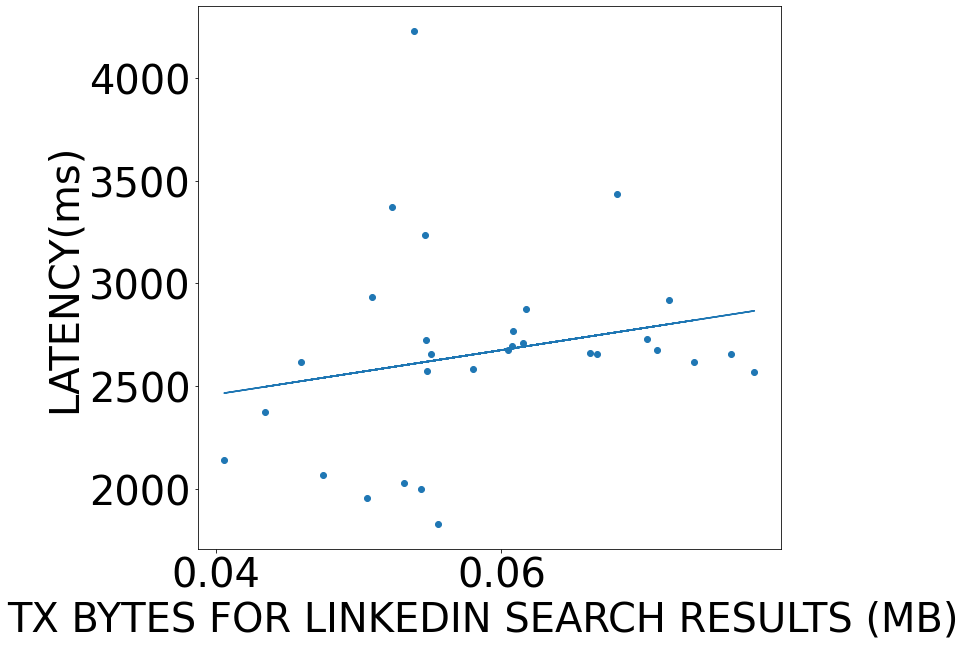

In [ ]:
latency = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'search results page')]['LATENCY']
tx = dataset[(dataset['APP']=='linkedin') & (dataset['FEATURE_NAME']== 'search results page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR LINKEDIN SEARCH RESULTS (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR LINKEDIN SEARCH RESULTS.pdf', bbox_inches='tight')

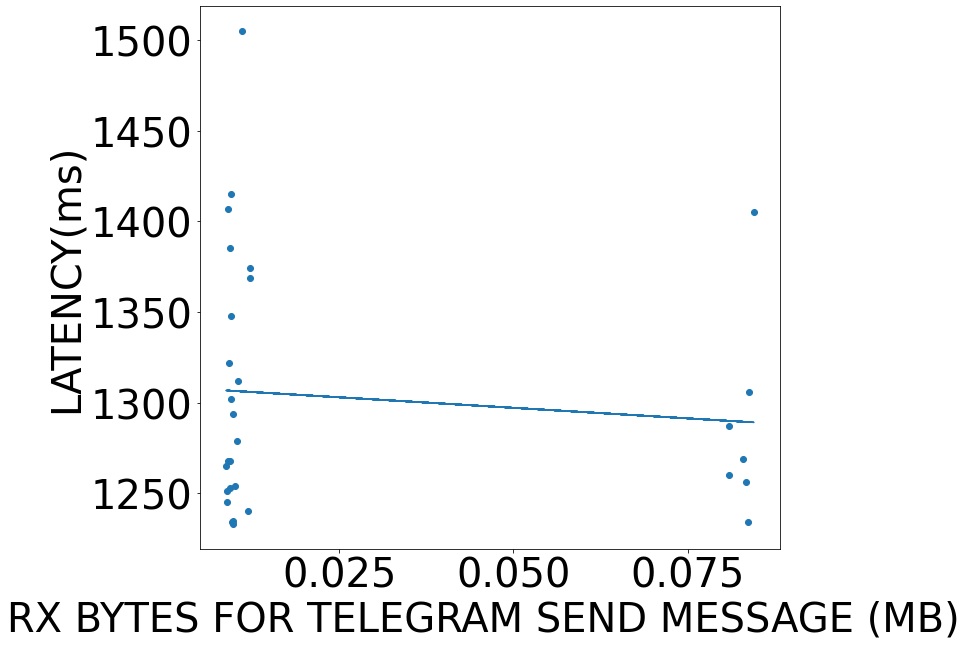

In [ ]:
latency = dataset[(dataset['APP']=='telegram') & (dataset['FEATURE_NAME']== 'send message')]['LATENCY']
rx = dataset[(dataset['APP']=='telegram') & (dataset['FEATURE_NAME']== 'send message')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR TELEGRAM SEND MESSAGE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR TELEGRAM SEND MESSAGE.pdf', bbox_inches='tight')

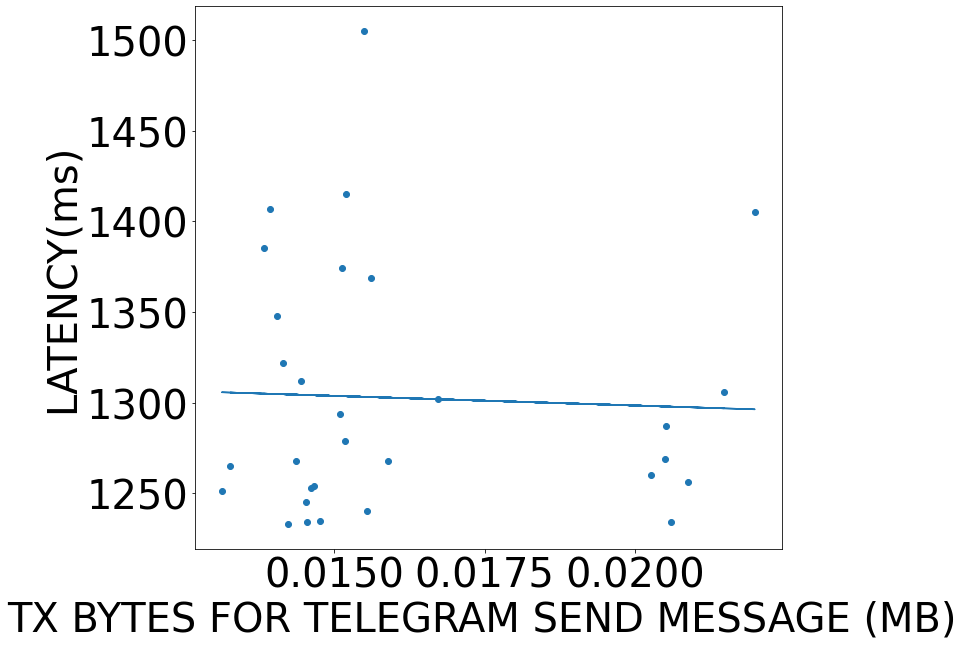

In [ ]:
latency = dataset[(dataset['APP']=='telegram') & (dataset['FEATURE_NAME']== 'send message')]['LATENCY']
tx = dataset[(dataset['APP']=='telegram') & (dataset['FEATURE_NAME']== 'send message')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR TELEGRAM SEND MESSAGE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR TELEGRAM SEND MESSAGE.pdf', bbox_inches='tight')

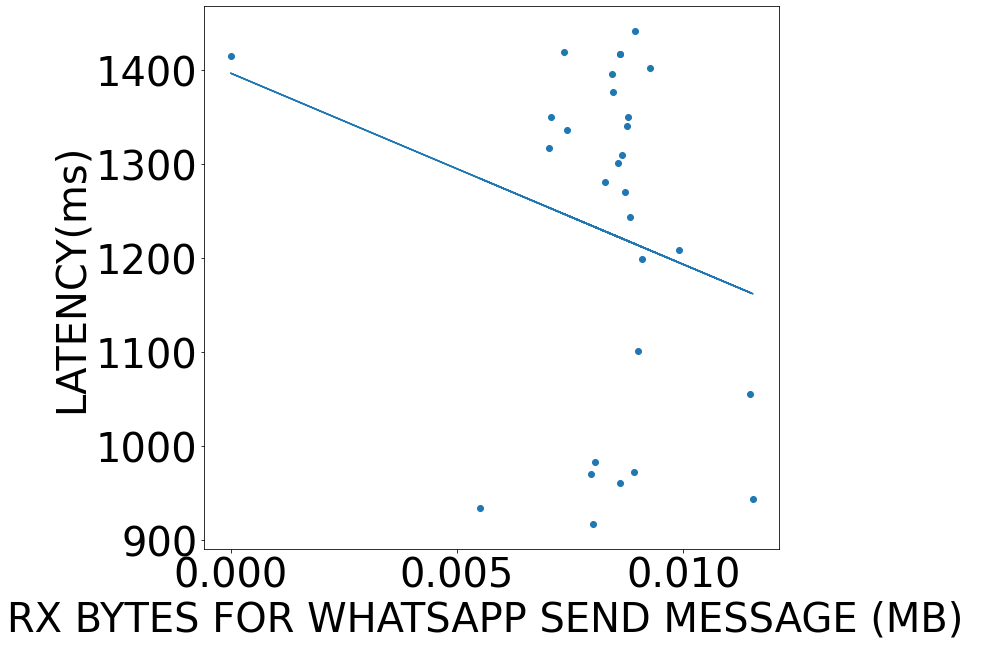

In [ ]:
latency = dataset[(dataset['APP']=='whatsapp') & (dataset['FEATURE_NAME']== 'sending message')]['LATENCY']
rx = dataset[(dataset['APP']=='whatsapp') & (dataset['FEATURE_NAME']== 'sending message')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR WHATSAPP SEND MESSAGE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR WHATSAPP SEND MESSAGE.pdf', bbox_inches='tight')

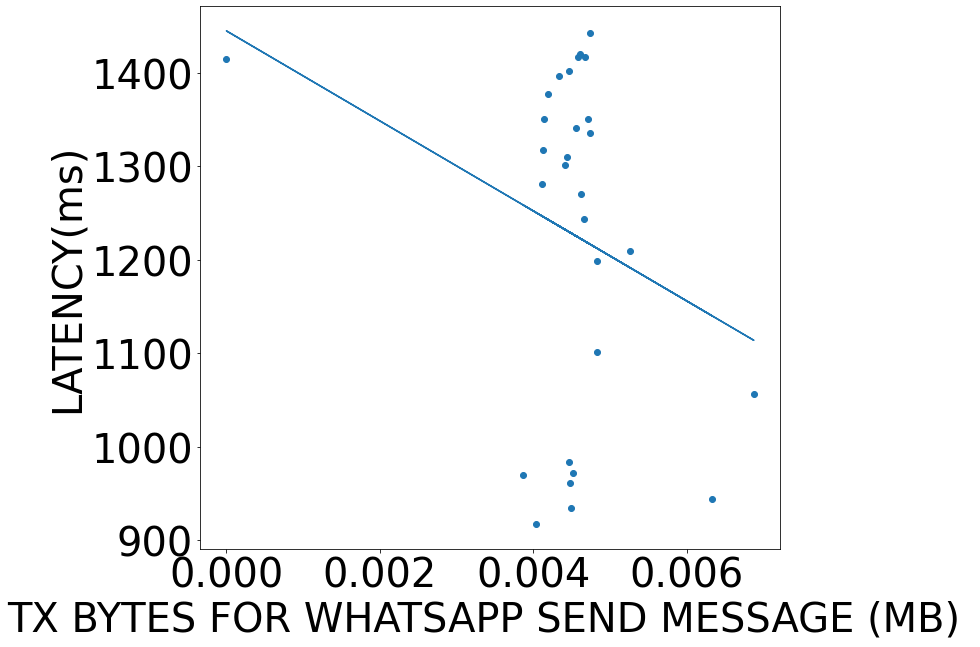

In [ ]:
latency = dataset[(dataset['APP']=='whatsapp') & (dataset['FEATURE_NAME']== 'sending message')]['LATENCY']
tx = dataset[(dataset['APP']=='whatsapp') & (dataset['FEATURE_NAME']== 'sending message')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR WHATSAPP SEND MESSAGE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR WHATSAPP SEND MESSAGE.pdf', bbox_inches='tight')

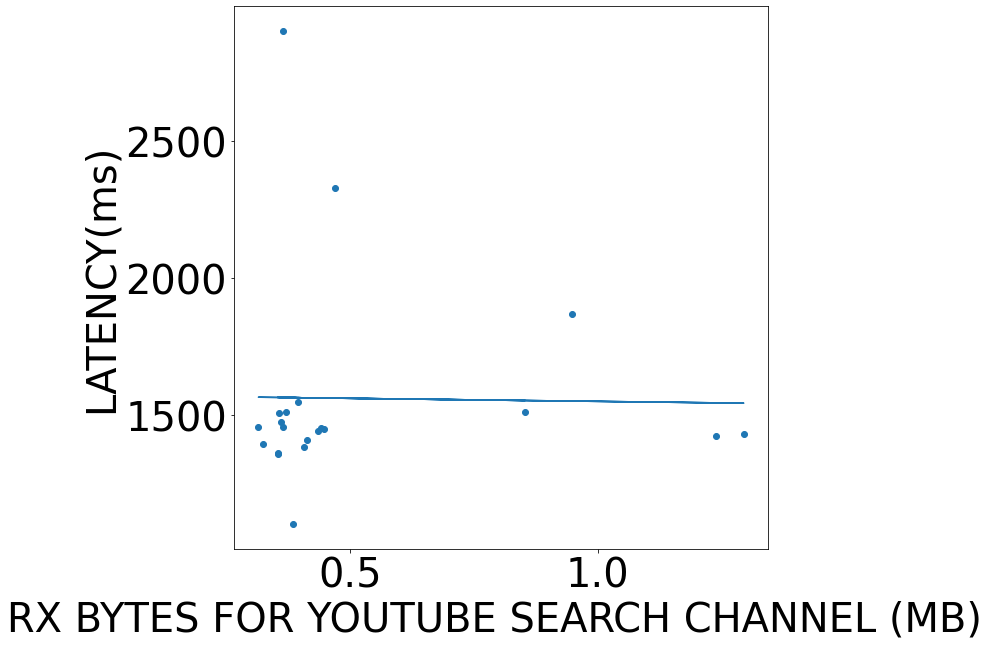

In [ ]:
latency = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'search channel page')]['LATENCY']
rx = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'search channel page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR YOUTUBE SEARCH CHANNEL (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR YOUTUBE SEARCH CHANNEL.pdf', bbox_inches='tight')

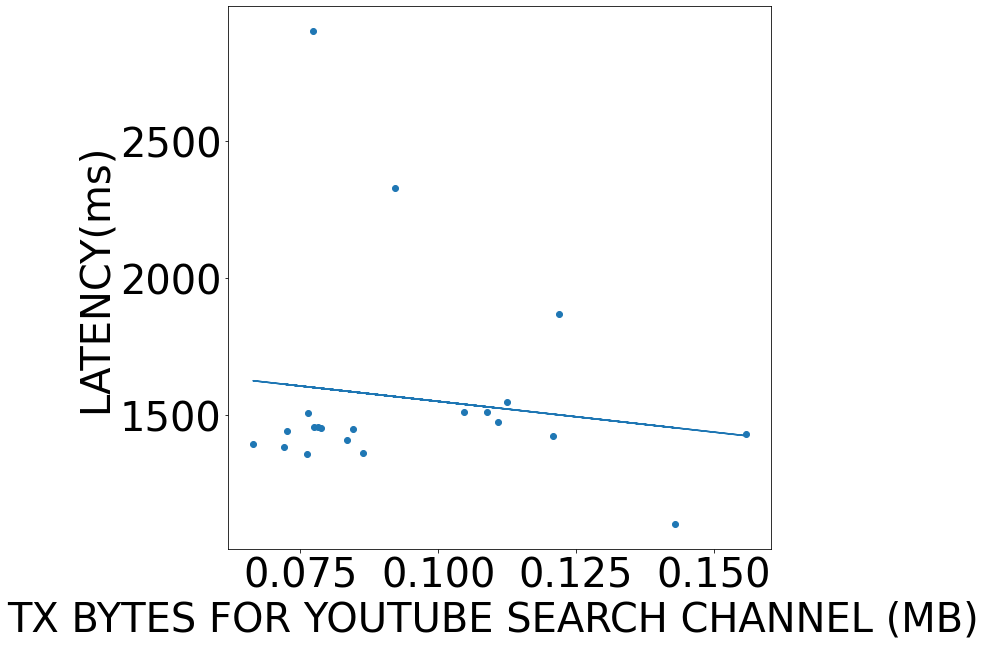

In [ ]:
latency = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'search channel page')]['LATENCY']
tx = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'search channel page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR YOUTUBE SEARCH CHANNEL (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR YOUTUBE SEARCH CHANNEL.pdf', bbox_inches='tight')

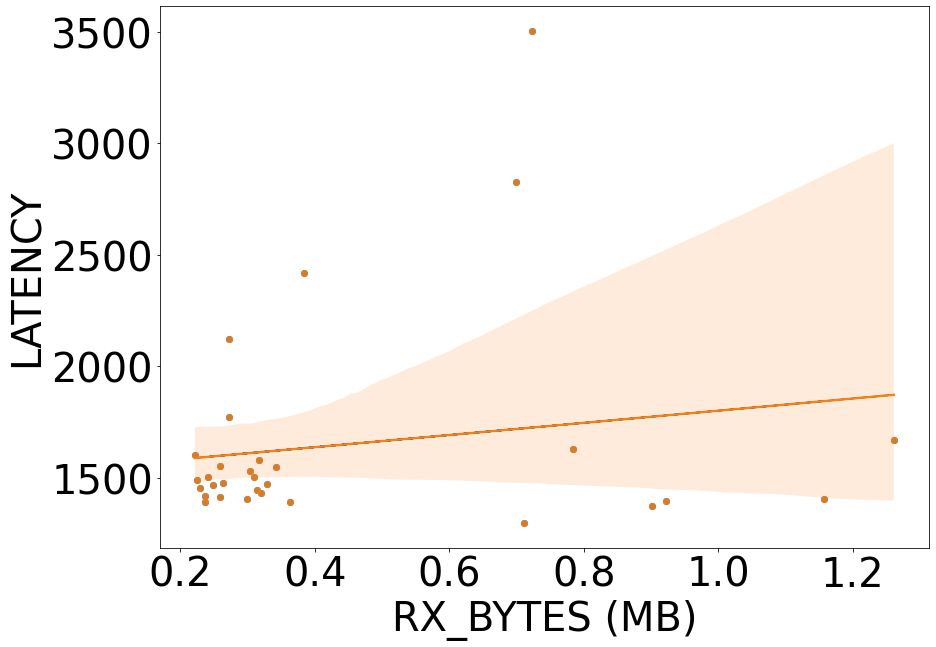

In [ ]:
latency = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'search video page')]['LATENCY']
rx = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'search video page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR YOUTUBE SEARCH VIDEO (MB) ")
plt.ylabel("LATENCY(ms)")
sb.regplot(x=rx, y=latency) 
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
#             'RX BYTES FOR YOUTUBE SEARCH VIDEO.pdf', bbox_inches='tight')

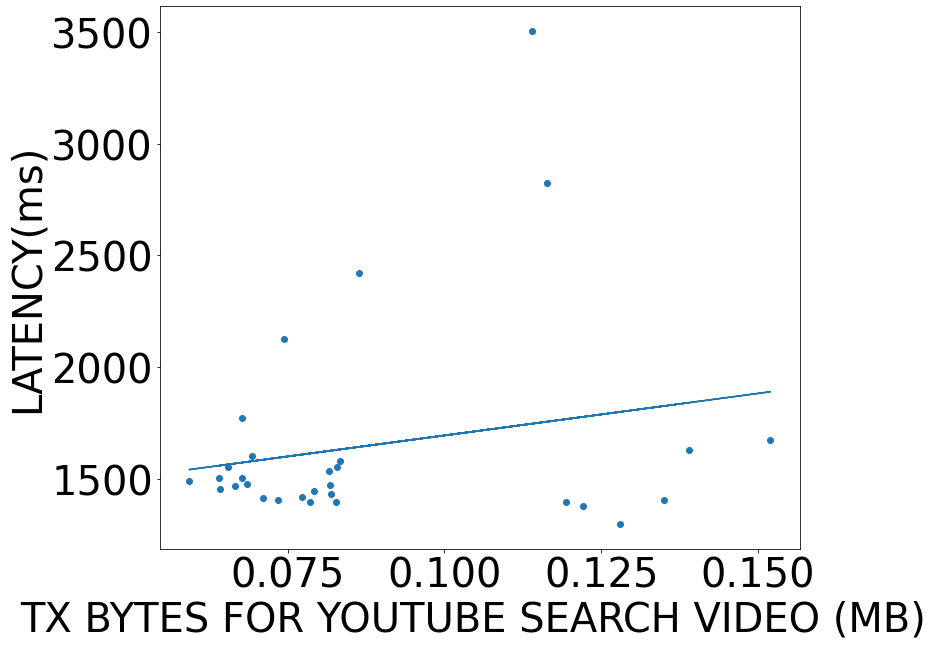

In [ ]:
latency = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'search video page')]['LATENCY']
tx = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'search video page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR YOUTUBE SEARCH VIDEO (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR YOUTUBE SEARCH VIDEO.pdf', bbox_inches='tight')

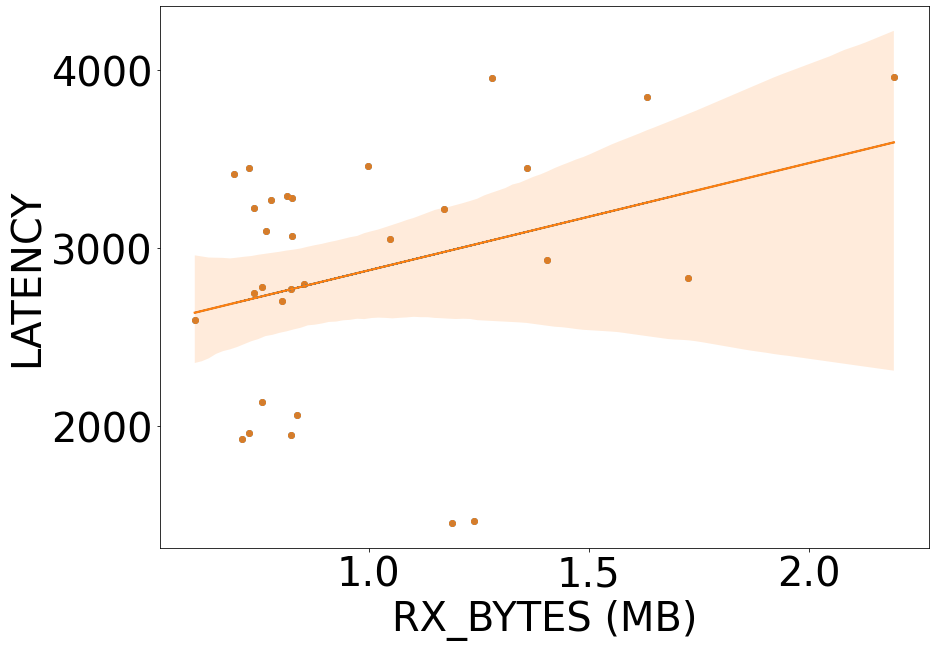

In [ ]:
latency = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'play video page')]['LATENCY']
rx = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'play video page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR YOUTUBE PLAY VIDEO (MB) ")
plt.ylabel("LATENCY(ms)")
sb.regplot(x=rx, y=latency) 
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
#             'RX BYTES FOR YOUTUBE PLAY VIDEO.pdf', bbox_inches='tight')

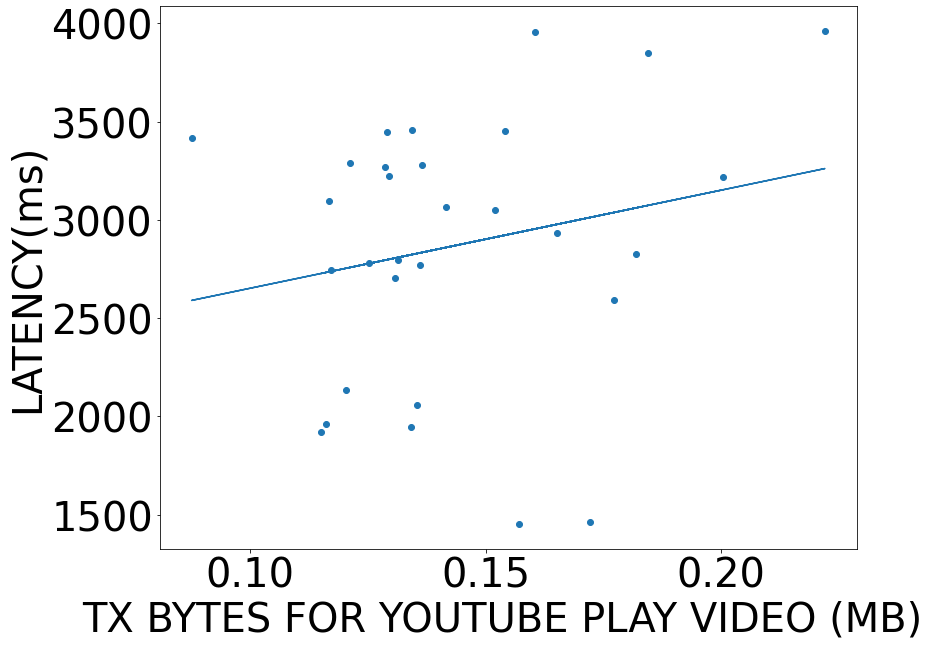

In [ ]:
latency = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'play video page')]['LATENCY']
tx = dataset[(dataset['APP']=='youtube') & (dataset['FEATURE_NAME']== 'play video page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR YOUTUBE PLAY VIDEO (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR YOUTUBE PLAY VIDEO.pdf', bbox_inches='tight')

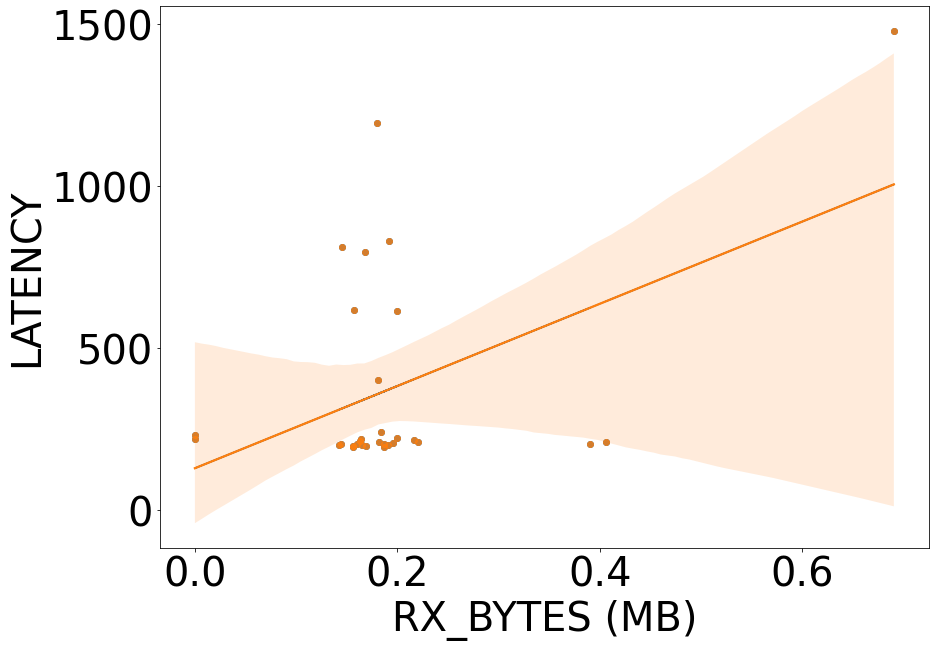

In [ ]:
latency = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'post in a group')]['LATENCY']
rx = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'post in a group')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR FACEBOOK POST IN A GROUP (MB) ")
plt.ylabel("LATENCY(ms)")
sb.regplot(x=rx, y=latency) 
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
#             'RX BYTES FOR FACEBOOK POST IN A GROUP.pdf', bbox_inches='tight')

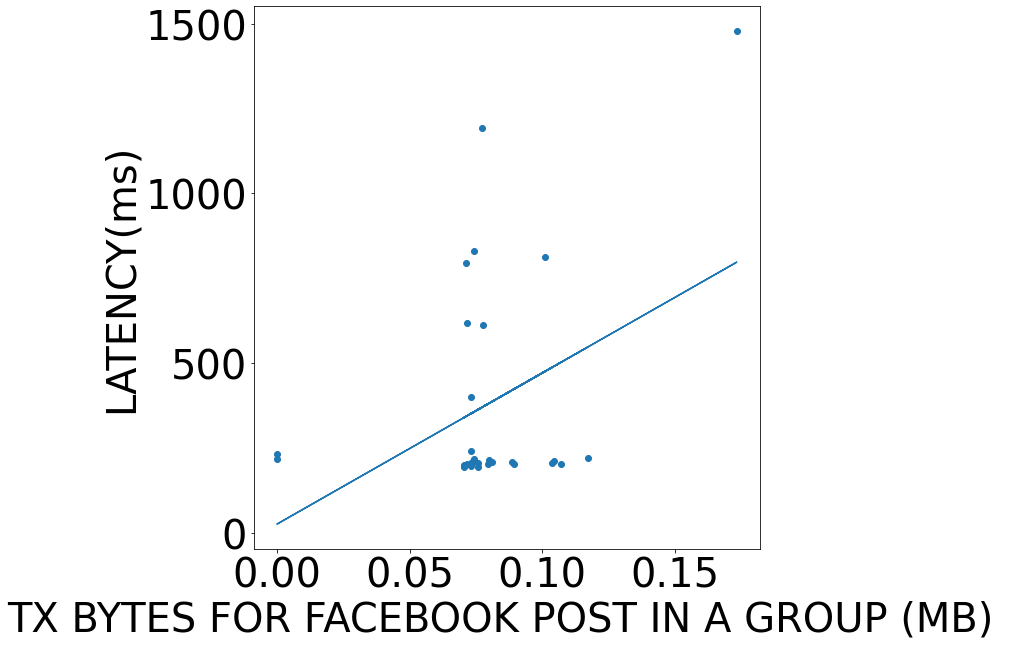

In [ ]:
latency = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'post in a group')]['LATENCY']
tx = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'post in a group')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR FACEBOOK POST IN A GROUP (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR FACEBOOK POST IN A GROUP.pdf', bbox_inches='tight')

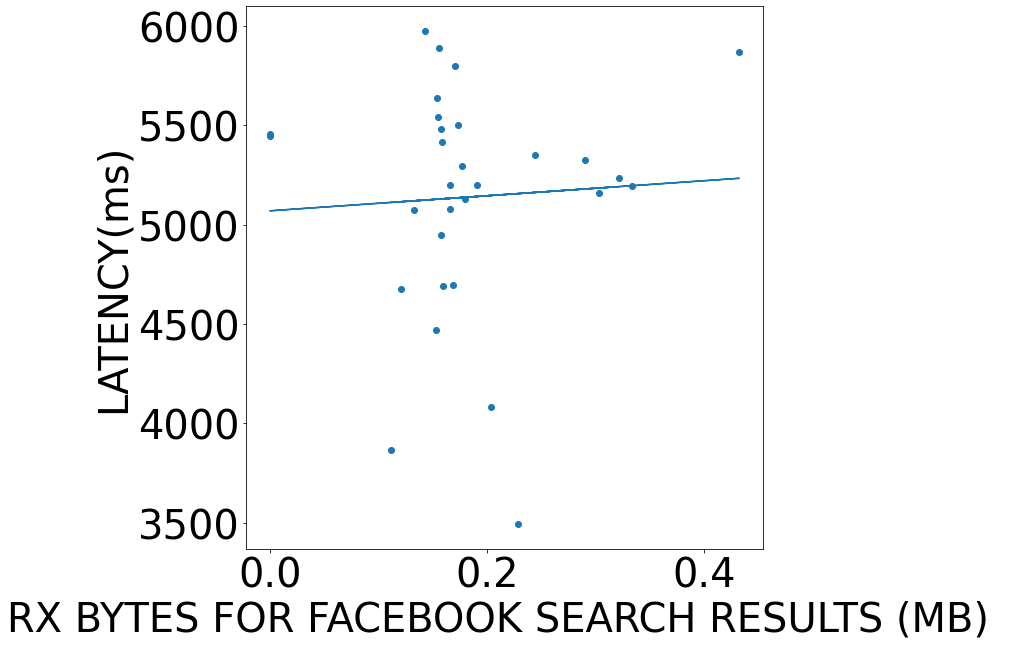

In [ ]:
latency = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'search results page')]['LATENCY']
rx = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'search results page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR FACEBOOK SEARCH RESULTS (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR FACEBOOK SEARCH RESULTS.pdf', bbox_inches='tight')

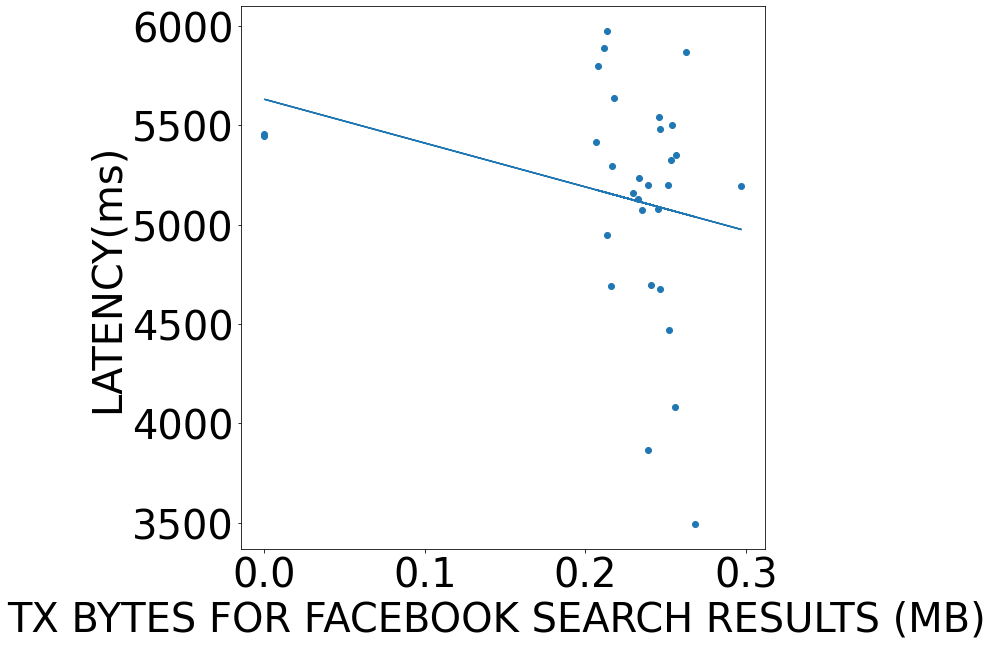

In [ ]:
latency = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'search results page')]['LATENCY']
tx = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'search results page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR FACEBOOK SEARCH RESULTS (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR FACEBOOK SEARCH RESULTS.pdf', bbox_inches='tight')

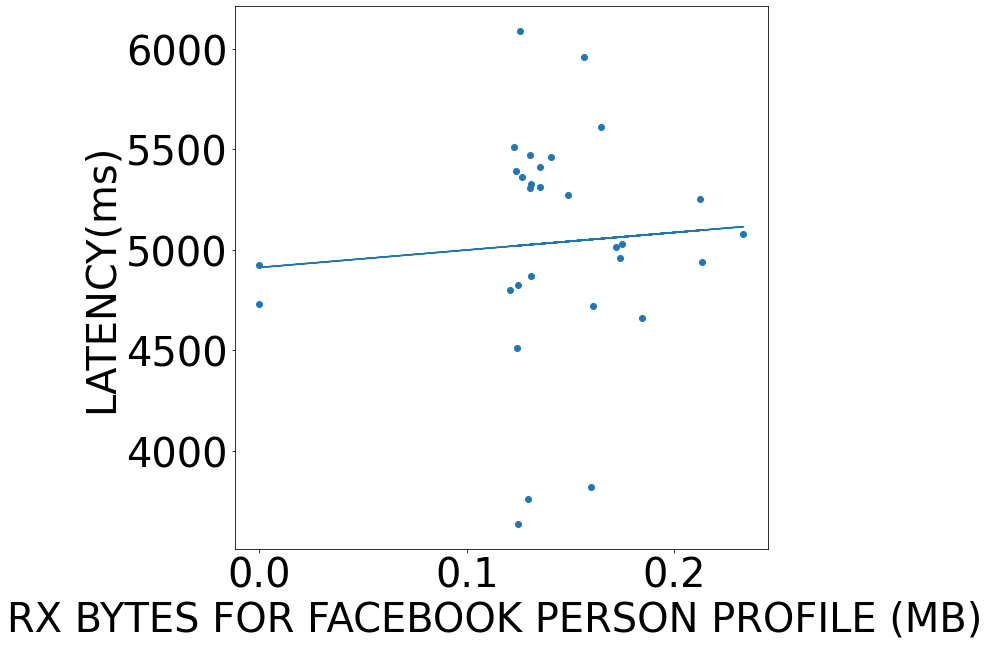

In [ ]:
latency = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'person profile page')]['LATENCY']
rx = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'person profile page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR FACEBOOK PERSON PROFILE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR FACEBOOK PERSON PROFILE.pdf', bbox_inches='tight')

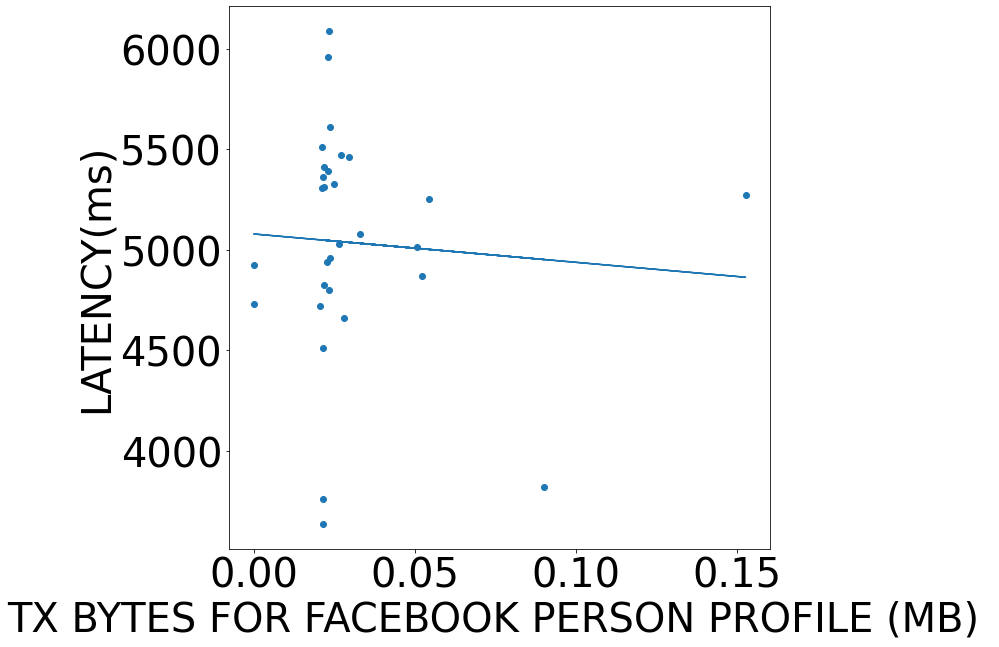

In [ ]:
latency = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'person profile page')]['LATENCY']
tx = dataset[(dataset['APP']=='facebook') & (dataset['FEATURE_NAME']== 'person profile page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR FACEBOOK PERSON PROFILE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR FACEBOOK PERSON PROFILE.pdf', bbox_inches='tight')

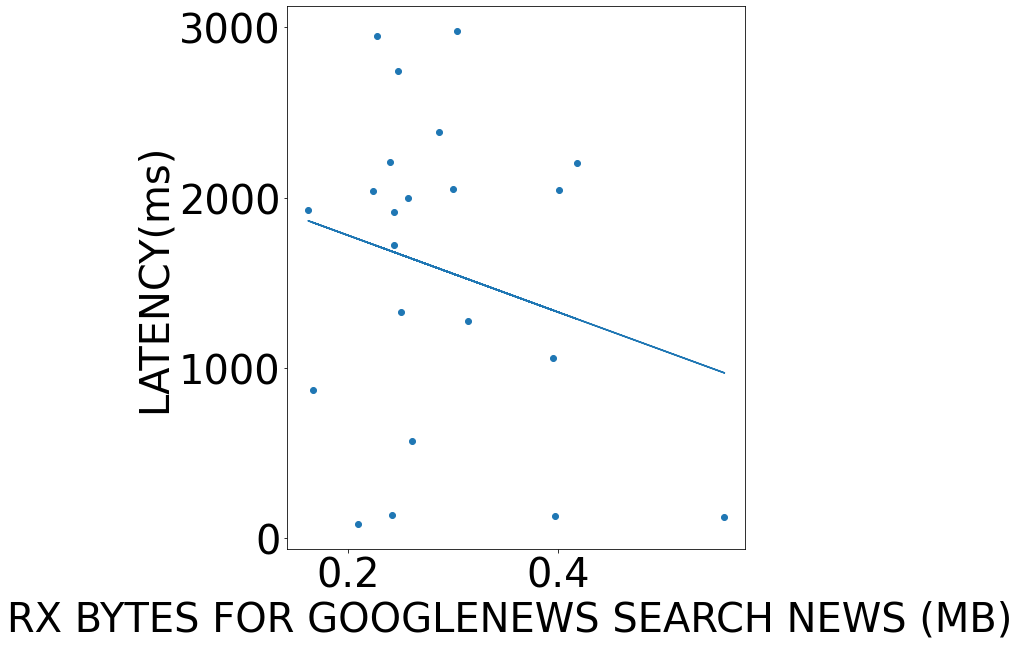

In [ ]:
latency = dataset[(dataset['APP']=='googlenews') & (dataset['FEATURE_NAME']== 'search news')]['LATENCY']
rx = dataset[(dataset['APP']=='googlenews') & (dataset['FEATURE_NAME']== 'search news')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR GOOGLENEWS SEARCH NEWS (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR GOOGLENEWS SEARCH NEWS.pdf', bbox_inches='tight')

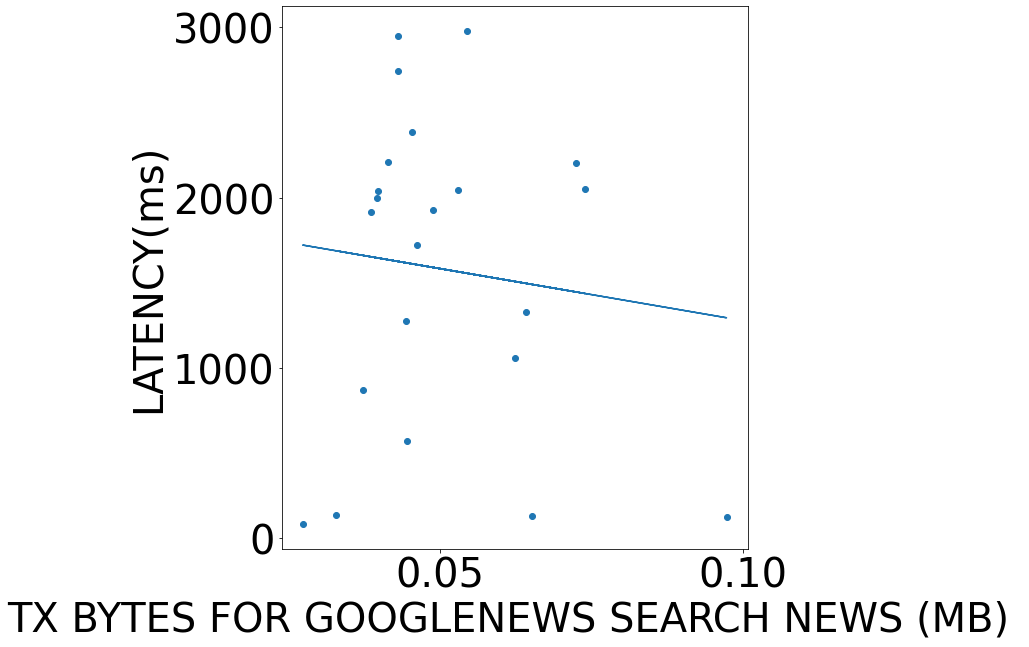

In [ ]:
latency = dataset[(dataset['APP']=='googlenews') & (dataset['FEATURE_NAME']== 'search news')]['LATENCY']
tx = dataset[(dataset['APP']=='googlenews') & (dataset['FEATURE_NAME']== 'search news')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR GOOGLENEWS SEARCH NEWS (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR GOOGLENEWS SEARCH NEWS.pdf', bbox_inches='tight')

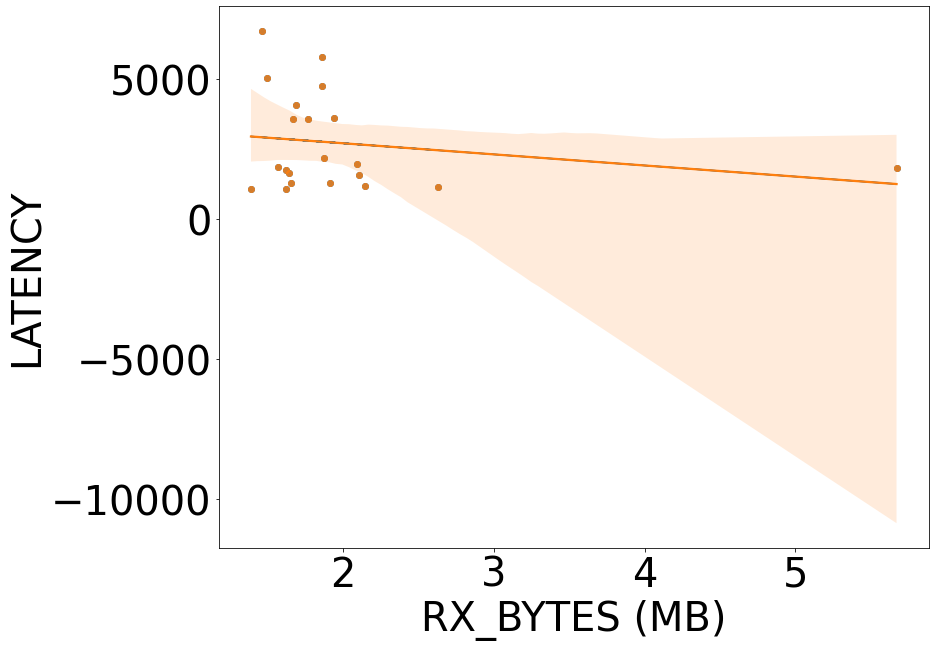

In [ ]:
latency = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'search results page')]['LATENCY']
rx = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'search results page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR AMAZON SEARCH PRODUCT (MB) ")
plt.ylabel("LATENCY(ms)")
sb.regplot(x=rx, y=latency) 
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
#             'RX BYTES FOR AMAZON SEARCH PRODUCT.pdf', bbox_inches='tight')

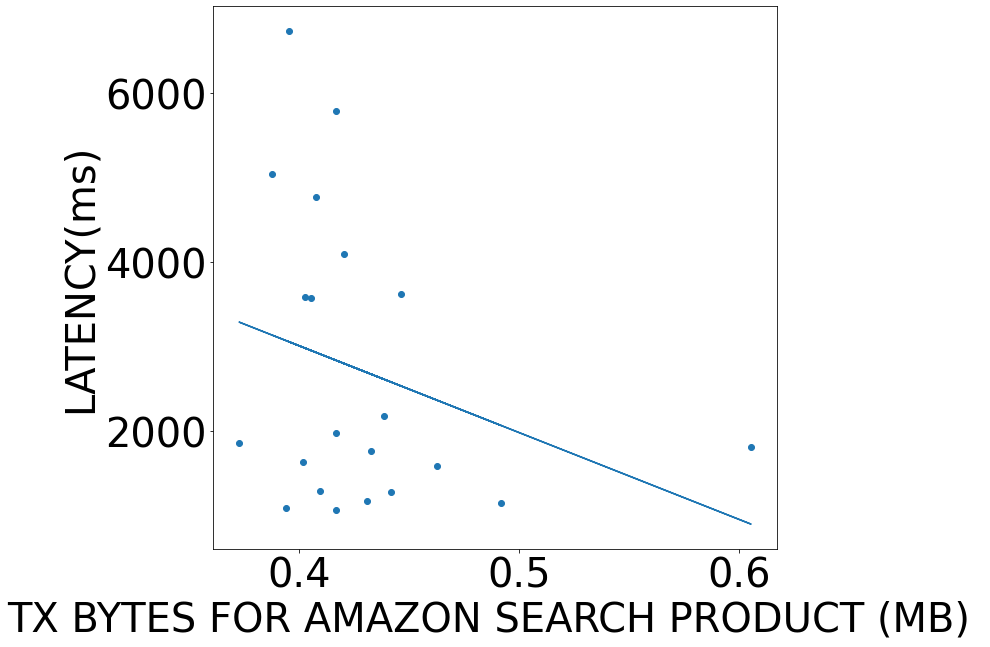

In [ ]:
latency = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'search results page')]['LATENCY']
tx = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'search results page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR AMAZON SEARCH PRODUCT (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR AMAZON SEARCH PRODUCT.pdf', bbox_inches='tight')

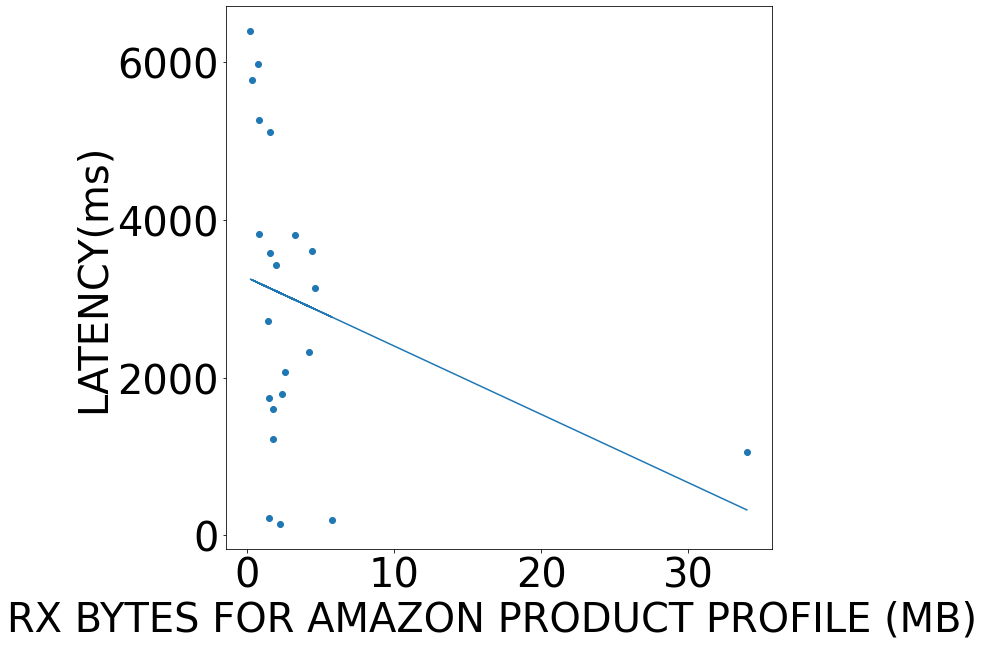

In [ ]:
latency = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'product profile page')]['LATENCY']
rx = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'product profile page')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR AMAZON PRODUCT PROFILE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR AMAZON PRODUCT PROFILE.pdf', bbox_inches='tight')

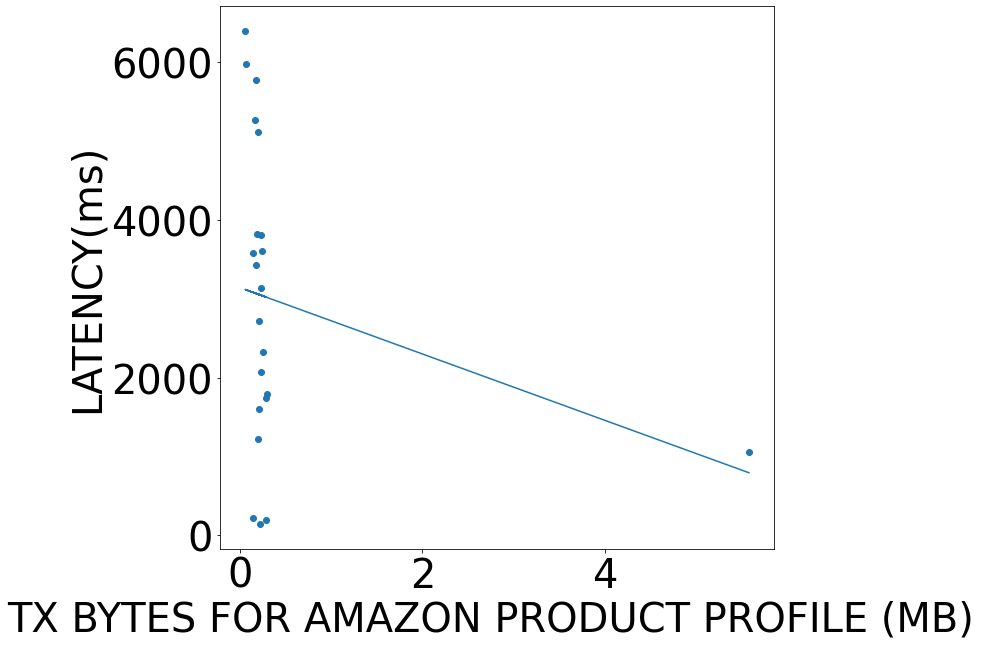

In [ ]:
latency = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'product profile page')]['LATENCY']
tx = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'product profile page')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR AMAZON PRODUCT PROFILE (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR AMAZON PRODUCT PROFILE.pdf', bbox_inches='tight')

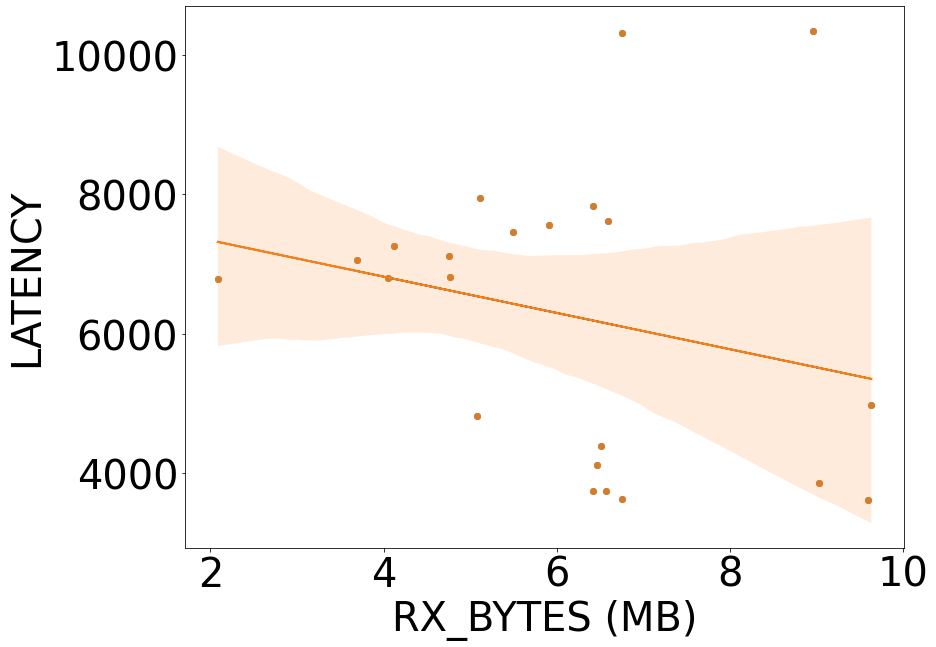

In [ ]:
latency = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'add to cart clicked')]['LATENCY']
rx = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'add to cart clicked')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR AMAZON ADD TO CART (MB) ")
plt.ylabel("LATENCY(ms)")
sb.regplot(x=rx, y=latency) 
plt.show()
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
#             'RX BYTES FOR AMAZON ADD TO CART.pdf', bbox_inches='tight')

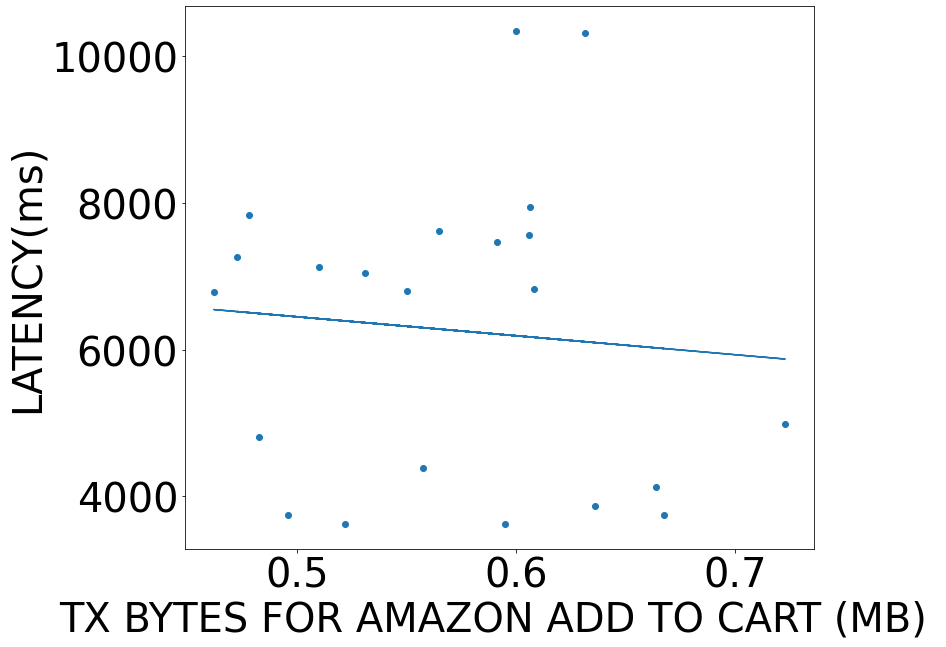

In [ ]:
latency = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'add to cart clicked')]['LATENCY']
tx = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'add to cart clicked')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR AMAZON ADD TO CART (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR AMAZON ADD TO CART.pdf', bbox_inches='tight')

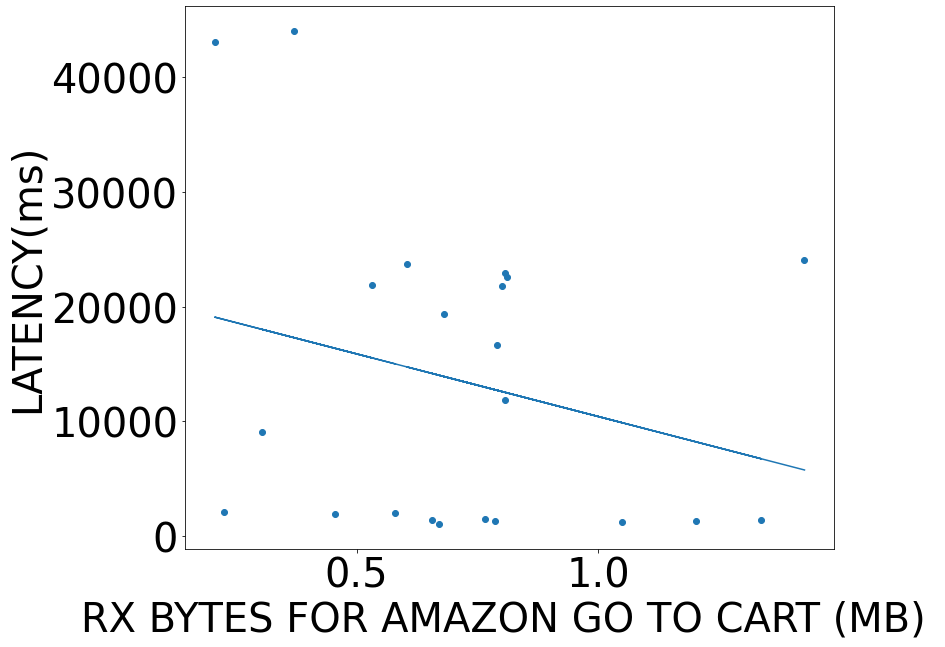

In [ ]:
latency = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'go to cart clicked')]['LATENCY']
rx = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'go to cart clicked')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR AMAZON GO TO CART (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR AMAZON GO TO CART.pdf', bbox_inches='tight')

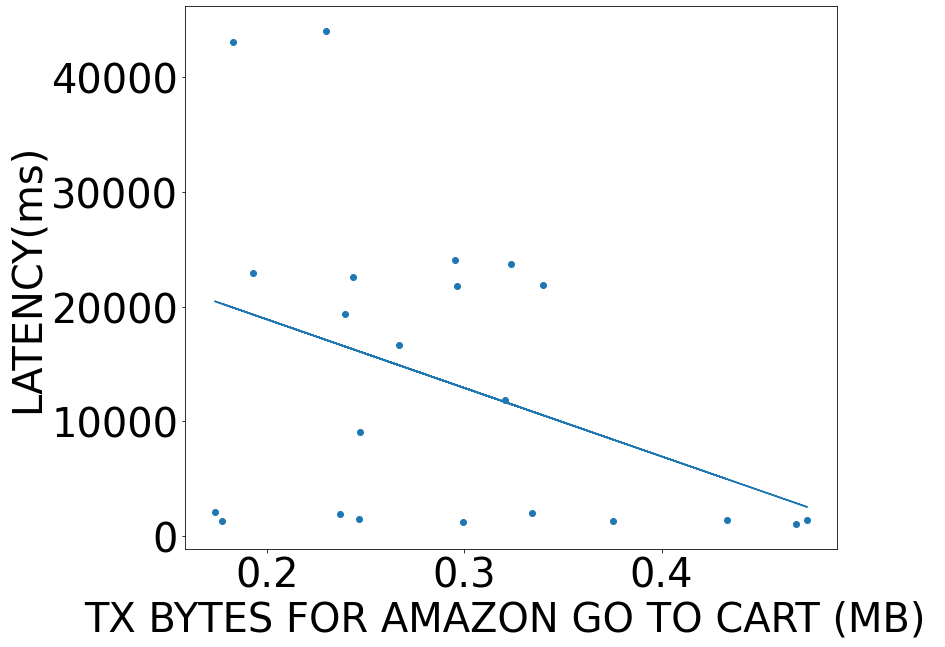

In [ ]:
latency = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'go to cart clicked')]['LATENCY']
tx = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'go to cart clicked')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR AMAZON GO TO CART (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR AMAZON GO TO CART.pdf', bbox_inches='tight')

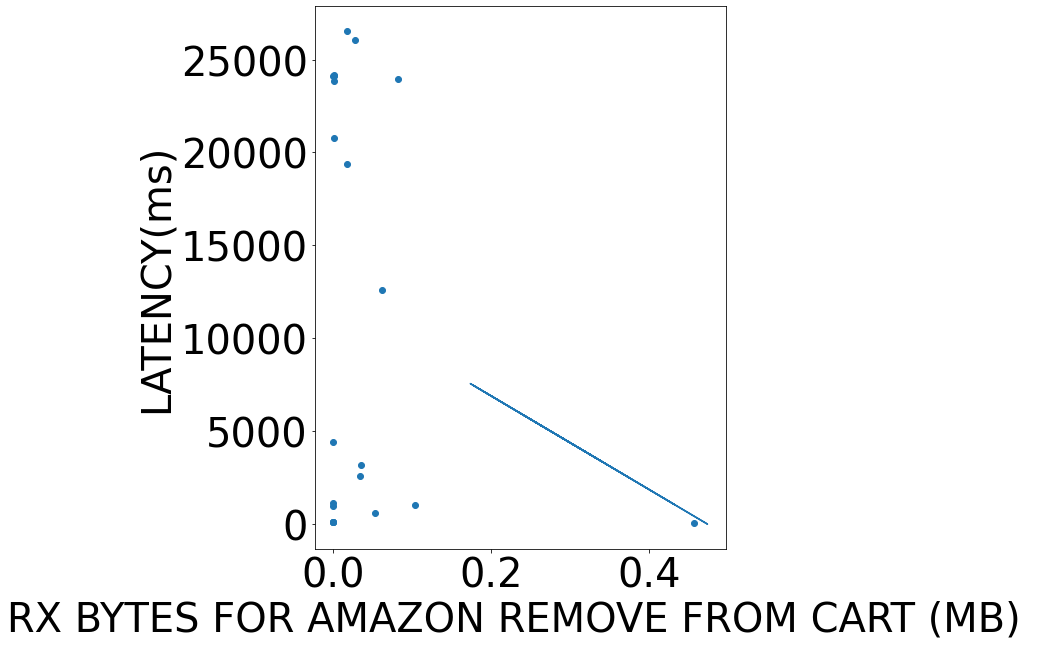

In [ ]:
latency = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'remove from cart clicked')]['LATENCY']
rx = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'remove from cart clicked')]['RX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("RX BYTES FOR AMAZON REMOVE FROM CART (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR AMAZON REMOVE FROM CART.pdf', bbox_inches='tight')

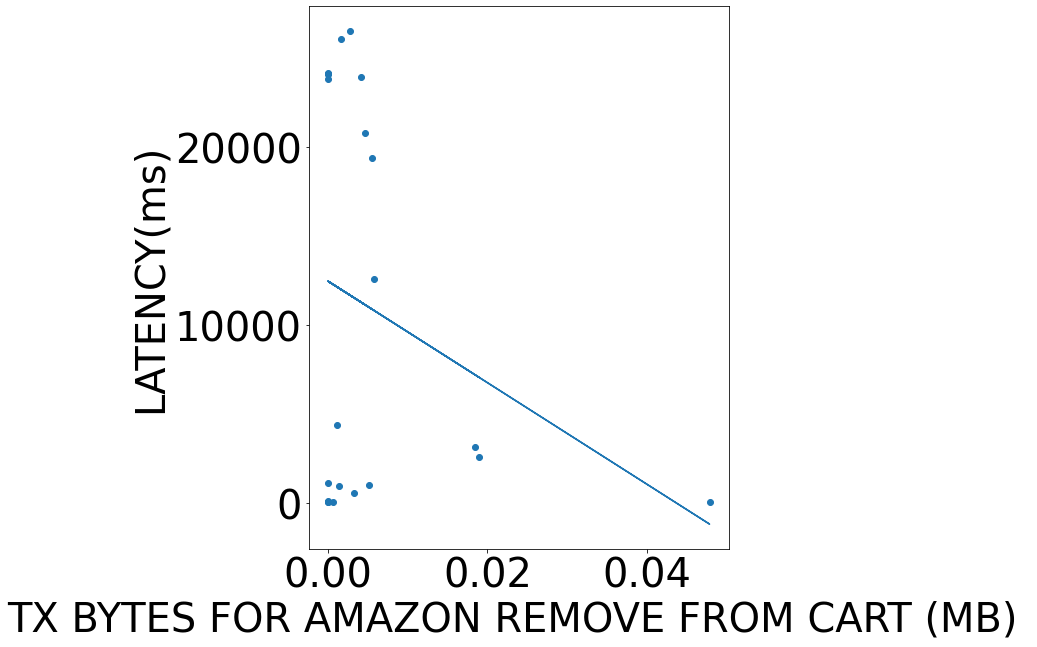

In [ ]:
latency = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'remove from cart clicked')]['LATENCY']
tx = dataset[(dataset['APP']=='amazon') & (dataset['FEATURE_NAME']== 'remove from cart clicked')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR AMAZON REMOVE FROM CART (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR AMAZON REMOVE FROM CART.pdf', bbox_inches='tight')

703    1001
704      53
705       0
706     563
707       0
708      68
709      71
710      70
711     220
712      66
713    1707
714      77
715     510
716       0
717       0
718      60
719      60
720      80
Name: LATENCY, dtype: int64
703    0.217271
704    0.562224
705    0.201481
706    0.212943
707    0.203043
708    0.266625
709    0.208627
710    0.228473
711    0.440793
712    0.639421
713    0.218166
714    0.239620
715    0.438553
716    0.051455
717    0.539076
718    0.270620
719    0.274593
720    0.421512
Name: RX_BYTES (MB), dtype: float64


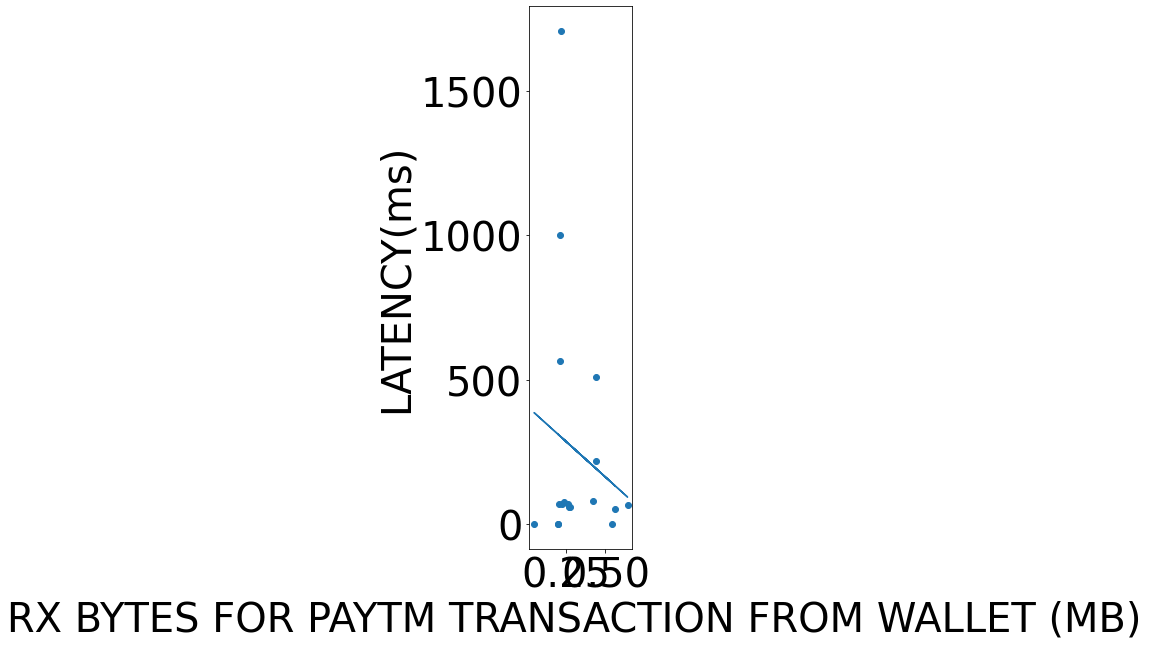

In [ ]:
latency = dataset[(dataset['APP']=='paytm') & (dataset['FEATURE_NAME']== 'transaction from wallet')]['LATENCY']
rx = dataset[(dataset['APP']=='paytm') & (dataset['FEATURE_NAME']== 'transaction from wallet')]['RX_BYTES (MB)']
print(latency)
print(rx)
plt.figure(figsize=(14,10))
plt.scatter(rx, latency, marker='o')
m, b = np.polyfit(rx, latency, 1)
plt.plot(rx, m*rx + b)
plt.xlabel("RX BYTES FOR PAYTM TRANSACTION FROM WALLET (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'RX BYTES FOR PAYTM TRANSACTION FROM WALLET.pdf', bbox_inches='tight')

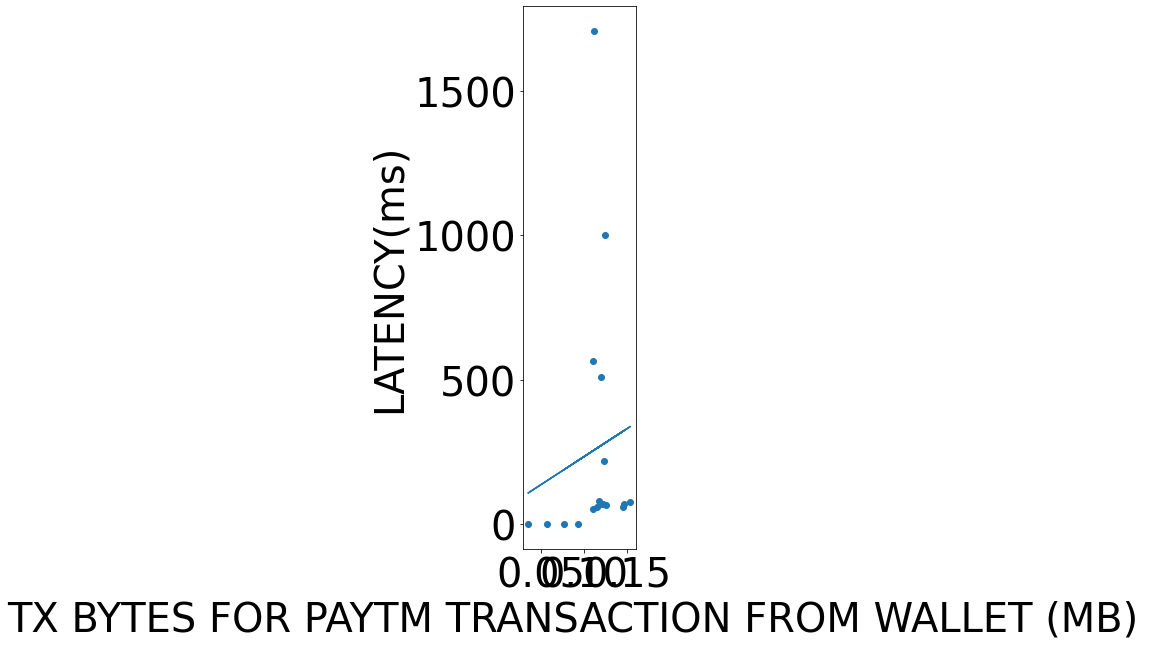

In [ ]:
latency = dataset[(dataset['APP']=='paytm') & (dataset['FEATURE_NAME']== 'transaction from wallet')]['LATENCY']
tx = dataset[(dataset['APP']=='paytm') & (dataset['FEATURE_NAME']== 'transaction from wallet')]['TX_BYTES (MB)']
# print(latency)
# print(tx)
plt.figure(figsize=(14,10))
plt.scatter(tx, latency, marker='o')
m, b = np.polyfit(tx, latency, 1)
plt.plot(tx, m*tx + b)
plt.xlabel("TX BYTES FOR PAYTM TRANSACTION FROM WALLET (MB) ")
plt.ylabel("LATENCY(ms)")
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/Bytes_Time_correlation/RX_TX_Scatter_Plots_Regression/'+
            'TX BYTES FOR PAYTM TRANSACTION FROM WALLET.pdf')

In [ ]:
len(dataset['APP'].unique())

12

In [ ]:
(dataset['FEATURE_NAME'].unique())

array(['opening news page', 'search product result', 'product profile',
       'add to cart', 'go to cart', 'remove from cart', 'search place',
       'search video page', 'play video page', 'my connections page',
       'my profile page', 'search results page', 'send message',
       'sending message', 'post in a group', 'person profile page',
       'search channel page', 'search news', 'product profile page',
       'add to cart clicked', 'go to cart clicked',
       'remove from cart clicked', 'transaction from wallet'],
      dtype=object)

In [ ]:
# Missing Actions
# Youtube - open channel
# LinkedIN - Search results
# Hotstar - trending 